## FINAL PROJECT SUBMISSION

Please fill out:
* Student name: MERCY KIRAGU
* Student pace: FULLTIME-HYBRID
* Scheduled project review date/time:07/06/2024
* Instructor name: MARYANN MWIKALI
* Blog post URL:N/A


## CREDIT CARD FRAUD DETECTION SYSTEM FOR ZEST BANK

### 1. BUSINESS UNDERSTANDING

### a.)OVERVIEW

Zest Bank, like many financial institutions, faces the constant threat of fraudulent activities. These credit card fraudulent activities can result in significant financial losses and damage to the bank's reputation. To mitigate these risks, Zest Bank is seeking to implement a robust fraud detection system that can accurately identify and prevent fraudulent transactions in real-time.

### b.) PROBLEM STATEMENT
For many banks,retainng high profitable customers is the number one goal.Banking fraud,however poses a significant threat to this goal for differrent banks including Zest Bank .In terms of substantial financial losses ,trust and credibility ,this is a concerning issue to both Zest Bank and it's customers.

Zest Bank faces a significant challenge in detecting and preventing fraudulent transactions within its extensive financial network. Conventional rule-based systems have proven insufficient against increasingly sophisticated fraud schemes, resulting in substantial financial losses and reputational harm. Therefore, there is an urgent need to develop and deploy an advanced fraud detection system capable of accurately identifying fraudulent activities in real-time, while minimizing false positives.

In this project I will create a system called SafeSwipe for detecting fraudulent credit card transactions with the help of classification machine learning models.




### c.) CHALLENGES

1. **Data Volume**: Handling the vast amount of data processed daily requires a model that responds quickly to detect fraud.

2. **Imbalanced Data**: With the majority of transactions being non-fraudulent, detecting the fraudulent ones becomes challenging.

3. **Data Privacy**: Accessing data, especially private information, poses a significant challenge.

4. **Misclassification**: Some fraudulent transactions go unnoticed, leading to misclassification.

5. **Adaptive Techniques by Scammers**: Scammers continually evolve their methods, posing a challenge to the effectiveness of fraud detection models. 
6. **Accuracy Metrics** :Accuracy alone may not be the most appropriate metric to evaluate the performance of the fraud detection model.






### d.) PROPOSED SOLUTIONS

**Solutions:**

1. **Simple and Fast Models**: Implementing models that are both simple and quick to identify anomalies and classify them as fraudulent transactions promptly.

2. **Imbalance Handling Methods**: Utilizing effective methods to address imbalance in the data,such as oversampling and undersampling methods ensuring accurate detection of fraudulent 
transactions.

3. **Privacy-preserving Techniques**: Reducing data dimensionality to protect user privacy while maintaining the model's effectiveness.

4. **Trustworthy Data Sources**: Using reliable data sources that verify and double-check the information, particularly during model training, to enhance accuracy.

5. **Interpretable Models**: Developing models that are simple and interpretable allows for swift adaptation to new scamming techniques with minimal adjustments, ensuring continuous deployment of effective fraud detection systems.

6. **use other metrics** :to use metrics such as roc_auc score and F1-score, along with accuracy, to evaluate the performance of a fraud detection model

### e.) OBJECTIVES

1. **Developing an Efficient Model**: Create various classification machine learning models and settling on the best performing model capable of accurately identifying fraudulent credit card transactions while minimizing false positives.

2. **Handling Imbalanced Data**: Implement techniques to address the class imbalance in the dataset, ensuring that the model can effectively learn from the limited number of fraudulent transactions.

3. **Real-time Detection**: Build a system that can process transactions in real-time, providing immediate alerts for potentially fraudulent activity to prevent financial losses.

4. **Privacy Preservation**: Incorporate privacy-preserving techniques to protect sensitive customer information while still allowing for effective fraud detection.

5. **Performance Evaluation**: Conduct thorough evaluation and validation of the model's performance using appropriate metrics, such as precision, recall, F1-score, to assess its effectiveness in real-world scenarios.
Also perform Cross Validation.

6. **Scalability**: Design the system to handle large volumes of transactions efficiently, ensuring scalability to accommodate growth in transaction volume over time.

7. **Normalization**: Apply normalization techniques to preprocess the data and standardize features, ensuring that the model's performance is not affected by variations in the scale of input features.

8. **Hyperparameter Tuning**: Explore and optimize the hyperparameters of the machine learning model to enhance its performance further. Utilize techniques such as grid search, random search to systematically search the hyperparameter space and identify the configuration that maximizes the model's effectiveness in fraud detection while minimizing computational resources and training time. Conduct cross-validation to validate the chosen hyperparameters and ensure robustness of the model across different subsets of the data.


## 2.) DATA UNDERSTANDING
### a.)DATA SOURCE
The dataset for this project was sourced from Kaggle, a platform for data science datasets.Specifically, the dataset  I used is the credit card fraud detection dataset.


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.The dataset consists of 31 columns/features and 284,807 rows

It contains only numerical input variables which are the result of a PCA transformation.Due to confidentiality issues original features and more background information about the data wasn't provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which were not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### IMPORTING THE NECESSARY LIBRARIES

In [89]:

# importing the necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score












import warnings
warnings.filterwarnings("ignore")



### LOADING THE DATA

In [90]:
#loading the data
df = pd.read_csv('creditcard.csv')


In [91]:
#code for displaying all the columns
pd.options.display.max_columns = None

In [92]:
#CHECKING THE FIRST FIVE ROWS
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [93]:
#CHECKING THE LAST FIVE ROWS
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## 3.)EXPLORATORY DATA ANALYSIS

In [94]:
#CHECKING THE ROWS AND COLUMNS
df.shape

(284807, 31)

In [95]:
#CHECKING ALL THE COLUMN NAMES
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [96]:
#CHECKING THE STATSTICAL SUMMARY OF THE FEATURES
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [97]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [98]:
#CHECKING THE DATATYPES AND NON/NULL DISTRIBUTION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### **Handling missing values**

In [99]:
#CHECKING IF THERE ARE ANY MISSING VALUES
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### **observation**

There are no features with missing values.

##### **Dealing with duplicates.**

In [100]:
df.duplicated().any()

True

In [101]:
df.duplicated().sum()

1081

##### **Observation**

There are 1081 rows with  duplicate values which we are going to drop.

In [102]:
#DROP THE DUPLICATED ROWS
# Identify duplicated rows
duplicated_rows = df.duplicated()

# Invert the boolean mask to keep non-duplicated rows
df = df[~duplicated_rows]

In [103]:
df.duplicated().any()

False

Our dataset now has no duplicates.

##### **Dealing with Outliers.**

As the whole dataset is transformed with PCA, I assume that the outliers are already treated. Hence not performing any outliers treatment on the dataset.

##### **Observing the distribution of our classes**

In [104]:
#CHECKING THE CLASS DISTRIBUTION OF THE TARGET VARIABLE
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [105]:
# CREATING NEW VARIABLES 'no_fraud' and 'fraud'
no_fraud = df['Class'] == 0
fraud = df['Class'] == 1


In [106]:
#CHECKING THE CLASS DISTRIBUTION OF THE TARGET VARIABLE IN PERCENTAGE
print('No Frauds', round(df['Class'].value_counts()[0] / len(df) *100,2), '%of the dataset')
print('Frauds', round(df['Class'].value_counts()[1] / len(df) *100,2), '%of the dataset')



No Frauds 99.83 %of the dataset
Frauds 0.17 %of the dataset


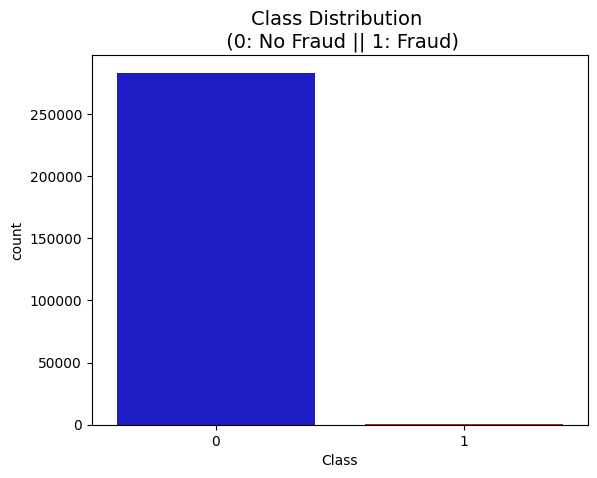

In [167]:


# Defining colors for the countplot
colors = ["#0101DF", "#DF0101"]

# Creating a countplot to visualize the class distribution of fraudulent vs non-fraudulent transactions
sns.countplot(x='Class', data=df, palette=colors)

# Adding title and labels to the plot
plt.title('Class Distribution \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


**Observation.**

The dataset exhibits a significant class imbalance, with non-fraudulent transactions representing approximately 99.83% of the data and fraudulent transactions accounting for the remaining 0.17%. This imbalance can pose challenges in training accurate machine learning models, as algorithms may tend to favor the majority class and perform poorly on the minority class.

 **observing the distribution of classes with Amount.**

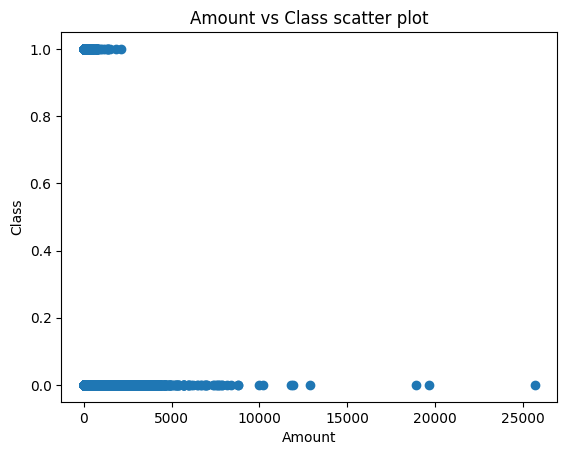

In [168]:
# Creating a scatter plot to observe the distribution of classes with Amount
plt.scatter(df["Amount"], df["Class"])
plt.title("Amount vs Class scatter plot")
plt.xlabel("Amount")
plt.ylabel("Class")
plt.show()


**Observation**

Clearly low amount transactions are more likely to be fraudulent than high amount transactions from the above visualization.

**Observing the distribution of classes with time.**

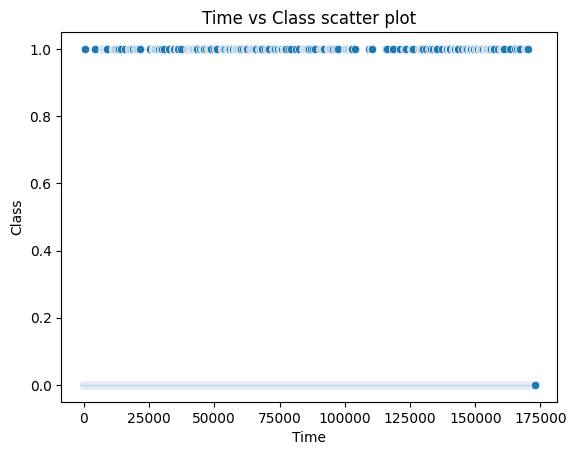

In [109]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x= df["Time"],y=df["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

##### **Observation**

There is not much insight can be drwan from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.

Dropping Time column as this feature is not going to help in the model building.


In [110]:

# Drop unnecessary columns
df = df.drop("Time", axis = 1)

**Checking the distribution of the numerical features**

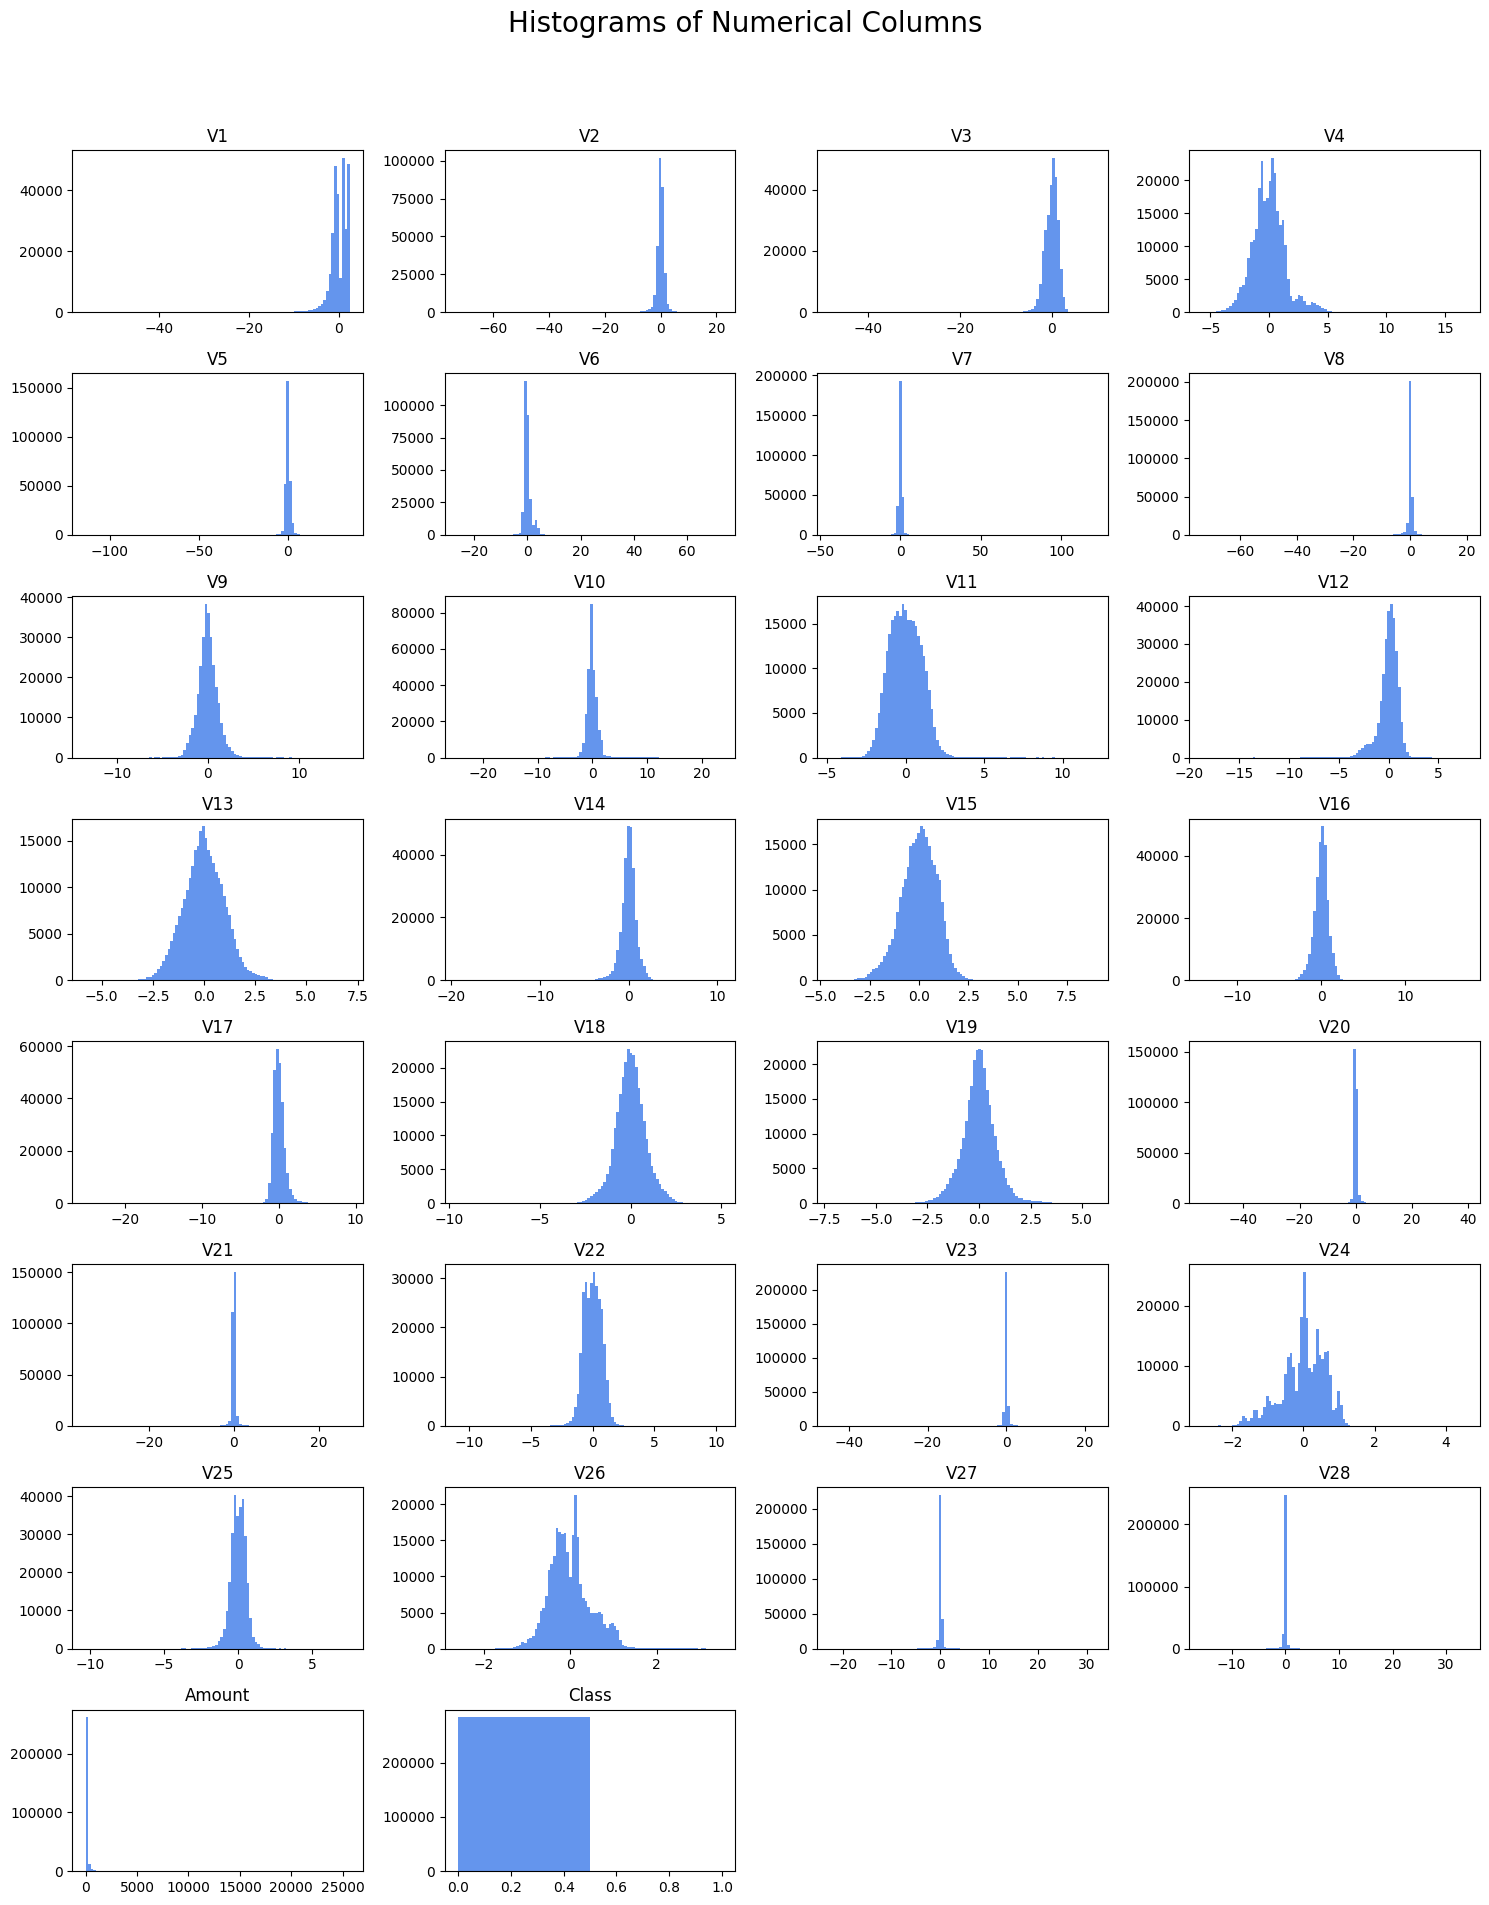

In [170]:
## Histograms to show the distribution of the numerical features.

# Define custom colors for histograms
hist_color = '#6495ED'

# Create a figure to hold the histograms
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)

# Iterate over each numerical column
for i in range(df.shape[1]):
    plt.subplot(8, 4, i + 1)
    ax = plt.gca()
    ax.set_title(df.columns.values[i])

    # Limiting the number of bins to 100 maximum
    num_unique_vals = np.size(df.iloc[:, i].unique())
    if num_unique_vals >= 100:
        num_unique_vals = 100

    # Plotting the histogram with custom color
    plt.hist(df.iloc[:, i], bins=num_unique_vals, color=hist_color)

# Adjusting layout and displaying the histograms
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**observation**

The features seem to have various distributions, including normal, uniform, and skewed distributions.
Most features appear to be centered around 0, with some exceptions (e.g., V17, V21).

**Correlation check**

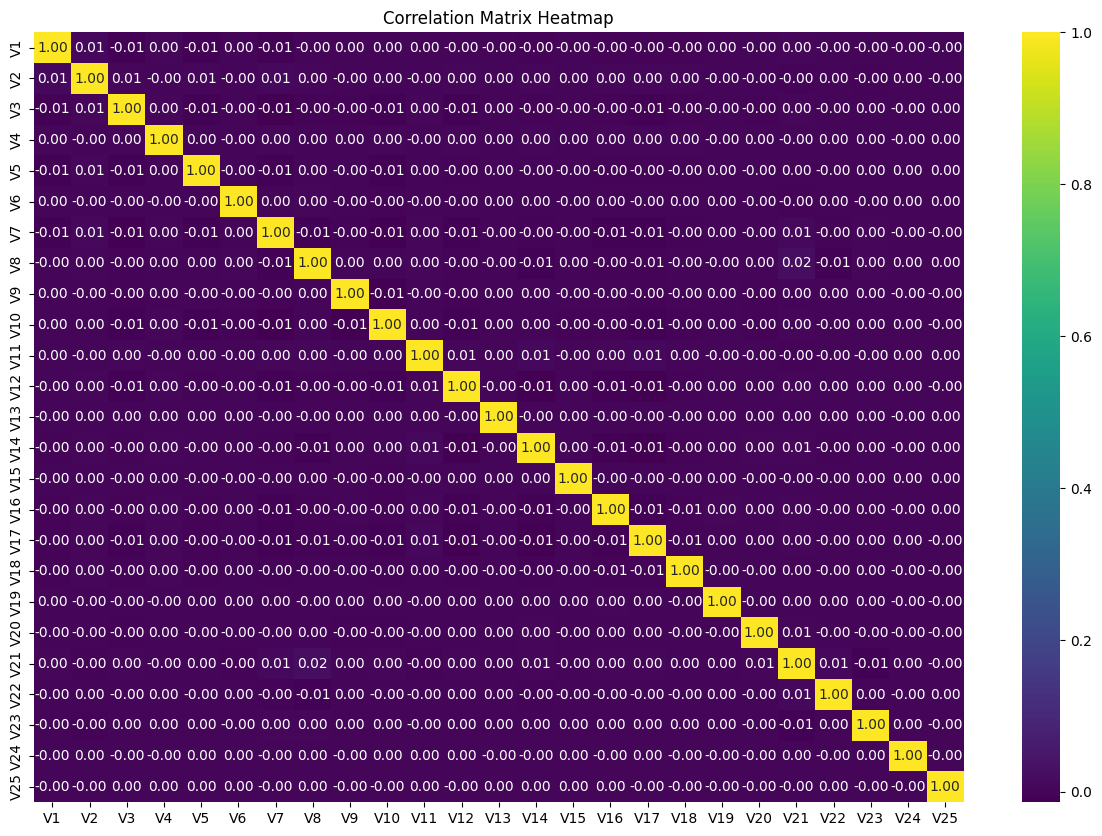

In [171]:
# Define the columns for which to calculate the correlation matrix
columns = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", 
           "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", 
           "V20", "V21", "V22", "V23", "V24", "V25"]

# Calculate the correlation matrix for the specified columns
correlation_matrix = df[columns].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


**Obseravation**

Clearly there is little to no correlation between the features.

**Kernel Density Estimates**

<Figure size 640x480 with 0 Axes>

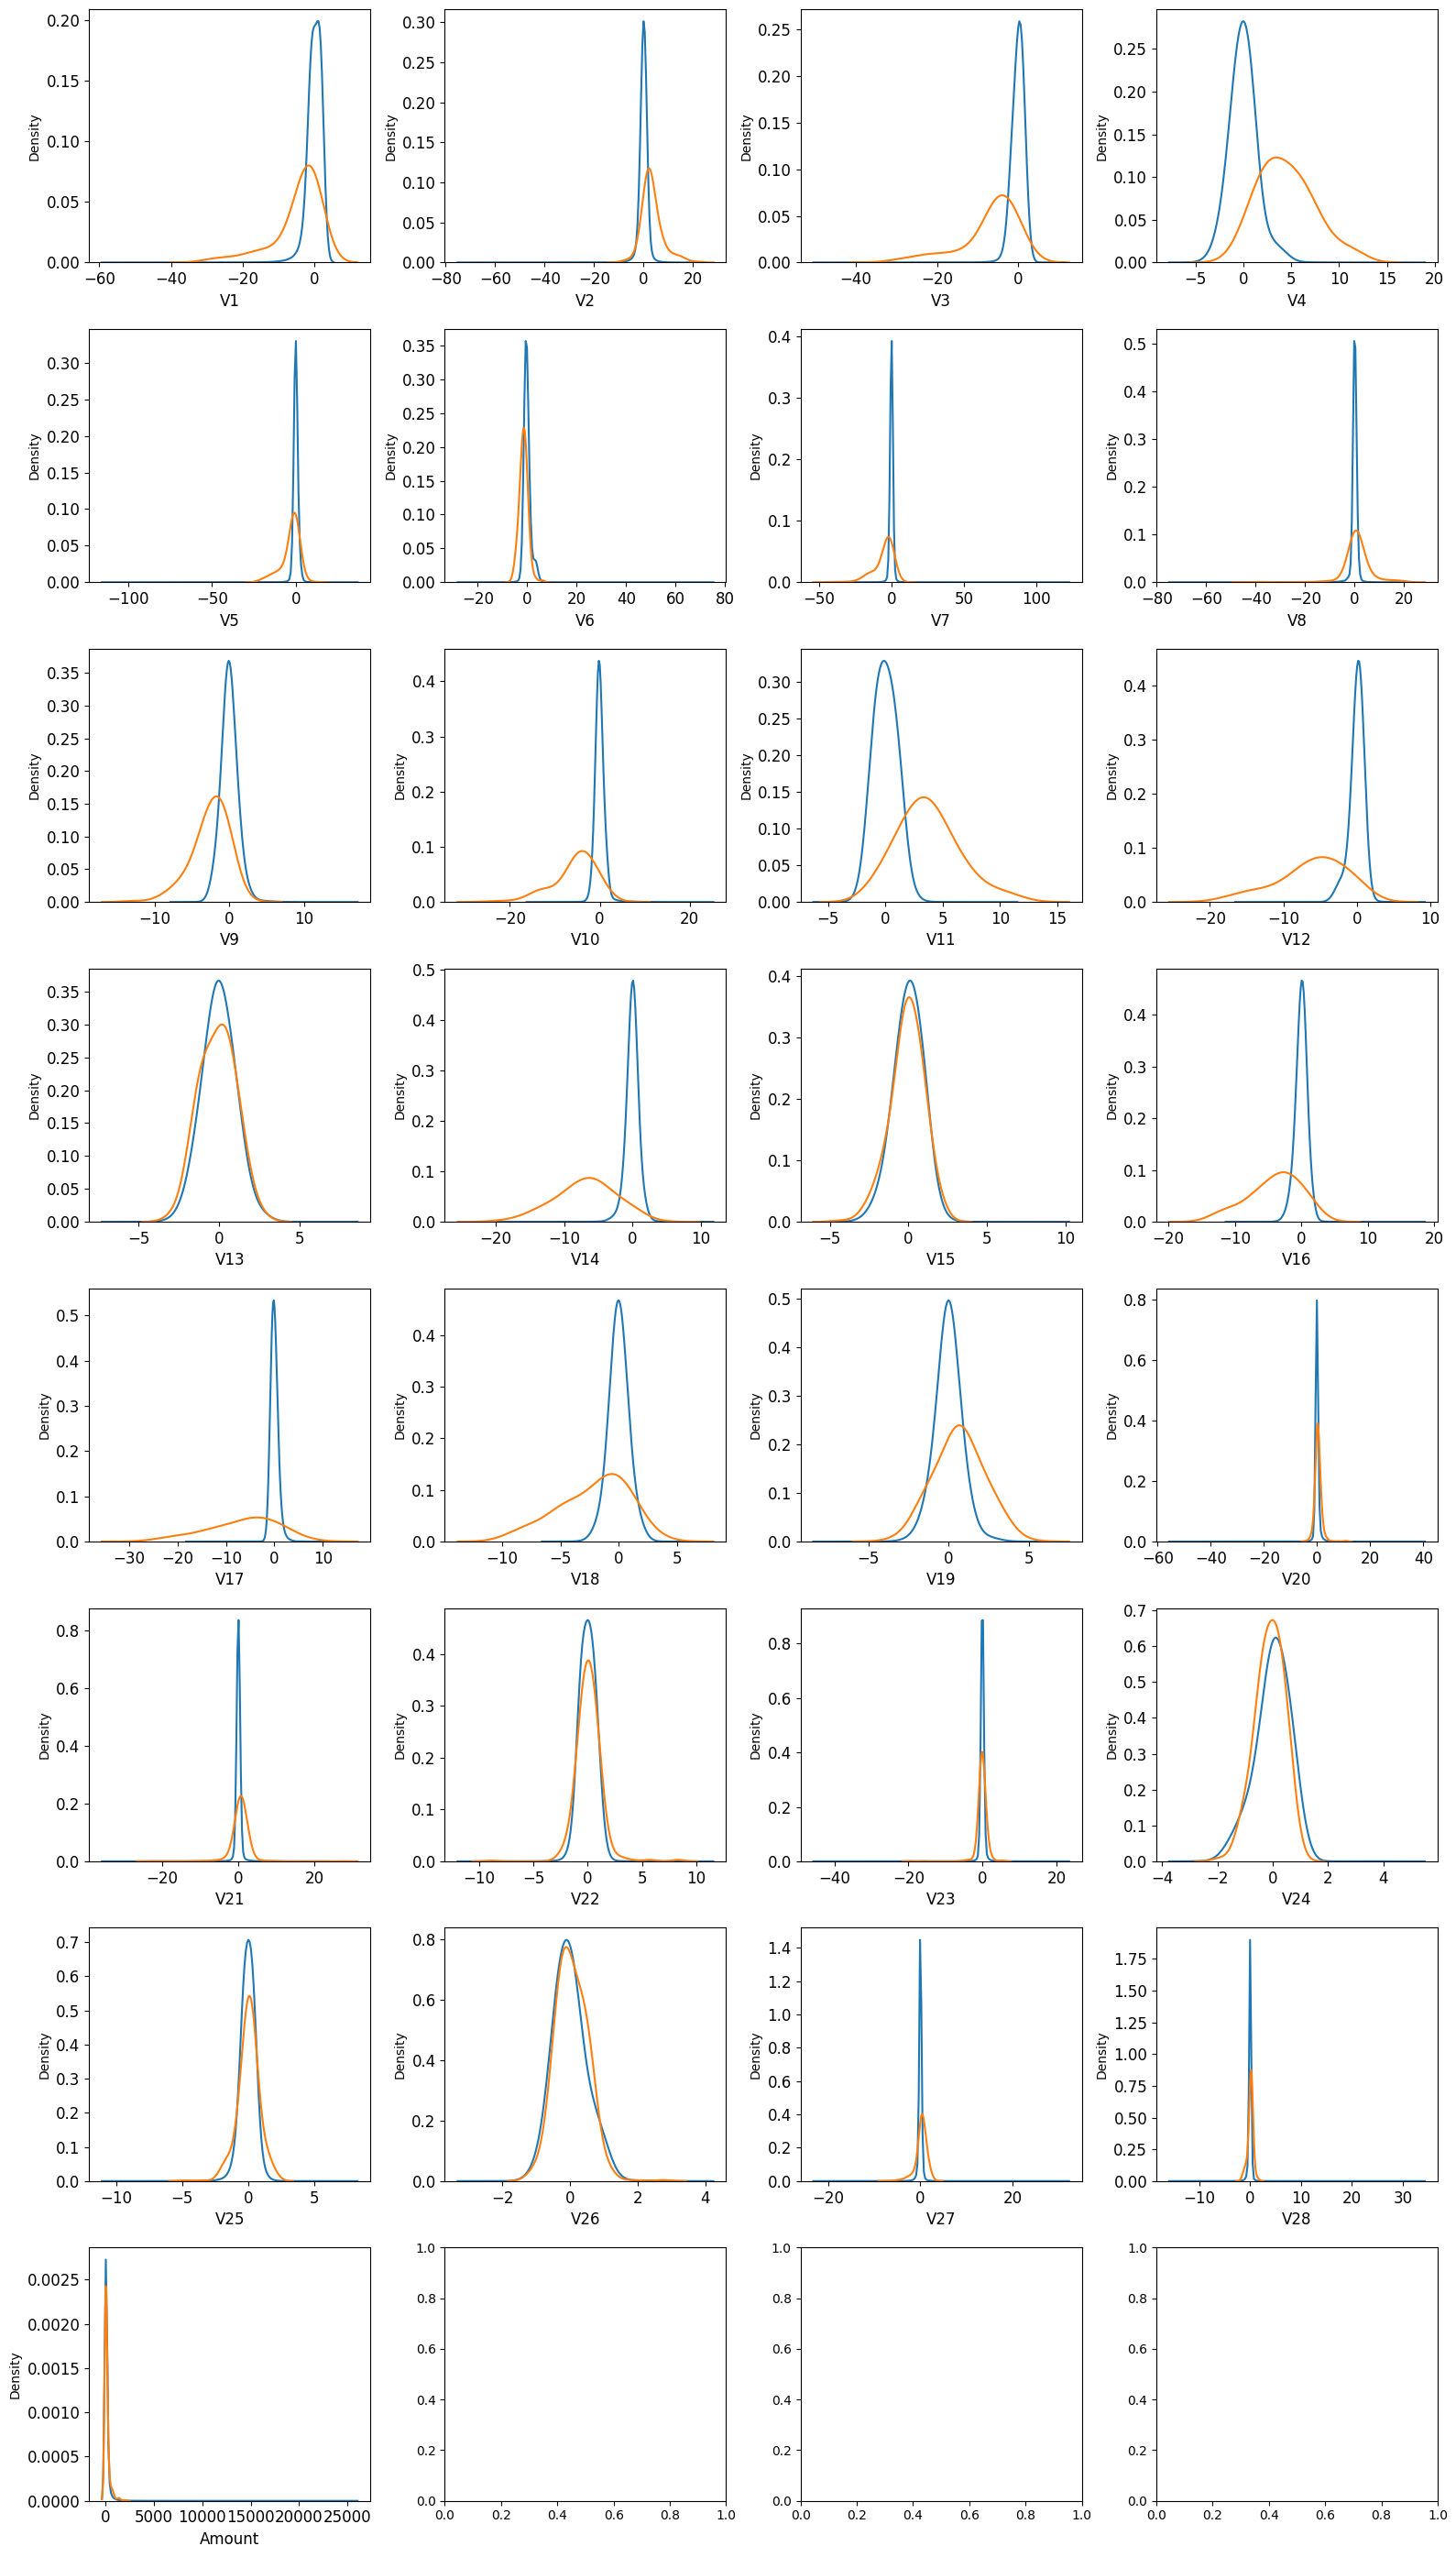

In [173]:
# Suppress UserWarnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Extracting all variable names except 'Class'
variables = list(df.columns.values)
variables.remove("Class")

# Splitting the dataset based on Class
no_fraud = df.loc[df['Class'] == 0]
fraud = df.loc[df['Class'] == 1]

# Creating subplots for visualizing the distribution of each variable
plt.figure()
fig, ax = plt.subplots(8, 4, figsize=(16, 28))

# Iterating through each variable
for i, feature in enumerate(variables):
    plt.subplot(8, 4, i + 1)
    
    # Plotting kernel density estimates for each class
    sns.kdeplot(no_fraud[feature], bw=0.5, label="0")
    sns.kdeplot(fraud[feature], bw=0.5, label="1")
    
    # Adding labels and adjusting tick parameters
    plt.xlabel(feature, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()


We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.


#### STORE  INDEPENDENT FEATURES IN X AND TARGET (RESPONSE) IN Y

In [114]:
#SPLITTING THE DATASET INTO X AND Y
X = df.drop('Class',axis=1)
y = df['Class']

In [115]:
#CHECKING SOME ROWS OF X
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [116]:
#CHECKING SOME ROWS OF Y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

#### **Handling the Imbalanced Dataset.**

**1) Choose Proper Evaluation Metrics**


Accuracy may be good enough for a well-balanced class but not ideal for the imbalanced class problem. The other metrics like precision( measure of how accurate the classifier’s prediction of a specific class ) and recall ( measure of the classifier’s ability to identify a class ) are also considered.

For an imbalanced class dataset, F1 score is a more appropriate metric. F1 score is defined as the harmonic mean between precision and recall. It is used as a statistical measure to rate performance. F1-score ranges between 0 and 1. The closer it is to 1, the better the model.

**2) Resampling(Undersampling and Oversampling)**

**OverSampling**

In [117]:
df.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [118]:

#create two different dataframe of majority and minority class 
df_majority = df[(df['Class']==0)] 
df_minority = df[(df['Class']==1)]

# upsample minority class
df_minority_oversampled = resample(df_minority,
                                 replace=True,
                                 n_samples=283253,
                                 random_state=42)
# Combine majority class with upsampled minority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
df_oversampled.Class.value_counts()

Class
1    283253
0    283253
Name: count, dtype: int64

In [119]:
X_oversampled = df_oversampled.drop('Class', axis=1)
y_oversampled = df_oversampled['Class']
X_oversampled.shape, y_oversampled.shape

((566506, 29), (566506,))

**Undersampling**

In [120]:


rus = RandomUnderSampler(random_state=42)

X_undersampled, y_undersampled = rus.fit_resample(X, y)
print(f"The number of Classes before the fit {Counter(y)}")
print(f"The number of Classes after the fit {Counter(y_undersampled)}")

The number of Classes before the fit Counter({0: 283253, 1: 473})
The number of Classes after the fit Counter({0: 473, 1: 473})


**3) SMOTE(Synthetic Minority Oversampling Technique)**

Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data.SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [121]:


# Resampling the minority class. The strategy can be changed as required.

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.

X_smote, y_smote = sm.fit_resample(df.drop('Class', axis=1), df['Class'])
smote_df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
X_smote.shape

(566506, 29)

In [122]:
smote_df.Class.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

### SPLITTING THE DATA INTO TRAIN AND TEST DATA

In [123]:
#SPLITTING THE DATASET USING TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

by splitting the dataset I'm preserving X_test and Y_test to evaluate once I'm done modelling.

In [124]:
# Checking the split of the class lable
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

473
383
90


##### **NORMALIZATION**

We need to scale Amount column.

In [125]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
#Instantiating the scaler
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [126]:
#checking if the amount column has been scaled
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
79119,-1.353894,-1.081034,1.787587,-1.803254,-0.235223,2.177295,1.014795,0.549627,0.629906,-1.488768,1.579133,1.209313,-0.429979,-0.610963,-1.131418,-0.647136,0.350953,-2.064159,-2.368923,0.420106,0.182520,0.367052,0.805029,-0.981966,-0.783392,0.905245,-0.176870,-0.093081,0.909212
265736,-0.059936,0.582525,-1.369698,-1.100370,3.707608,3.396709,1.218666,0.541196,-0.507983,-0.419227,-0.438801,-0.143149,-0.658636,0.377831,-0.864628,-0.595559,-0.687246,-0.630884,-1.018978,-0.103629,0.069615,0.311566,-0.268906,0.690685,0.463247,-0.637914,-0.121454,-0.196513,-0.218631
42801,-0.362164,0.715165,1.783253,0.230848,-0.240500,-0.508633,0.589763,-0.013746,-0.048097,-0.668365,-0.840314,0.093767,-0.238536,-0.191213,-0.337460,-0.281847,0.023268,-0.528238,0.384716,-0.036132,-0.212595,-0.515372,-0.044853,0.385330,-0.126762,0.139889,0.031010,0.057977,-0.271442
172689,-0.370982,0.446004,-0.732017,-1.088288,1.799175,-1.117223,1.502962,-0.553382,-0.240976,-0.167418,0.974559,0.457359,-0.604572,0.718360,-0.478633,-0.746844,-0.689893,0.173677,0.218804,-0.233555,0.263039,0.937860,-0.198459,0.728053,0.203829,-0.522782,-0.376116,-0.103404,-0.325679
179949,0.695644,0.177228,0.481414,-0.338853,-0.122807,0.074431,-0.509006,-0.775719,0.982836,-0.657858,-1.070360,0.801458,0.902157,-0.338631,0.081557,0.231948,-0.714601,0.152661,-0.647147,-0.275961,0.956704,0.468104,-0.195806,0.709315,0.487912,-0.246186,0.196872,0.197452,-0.311060


##### **Handling Skewness**

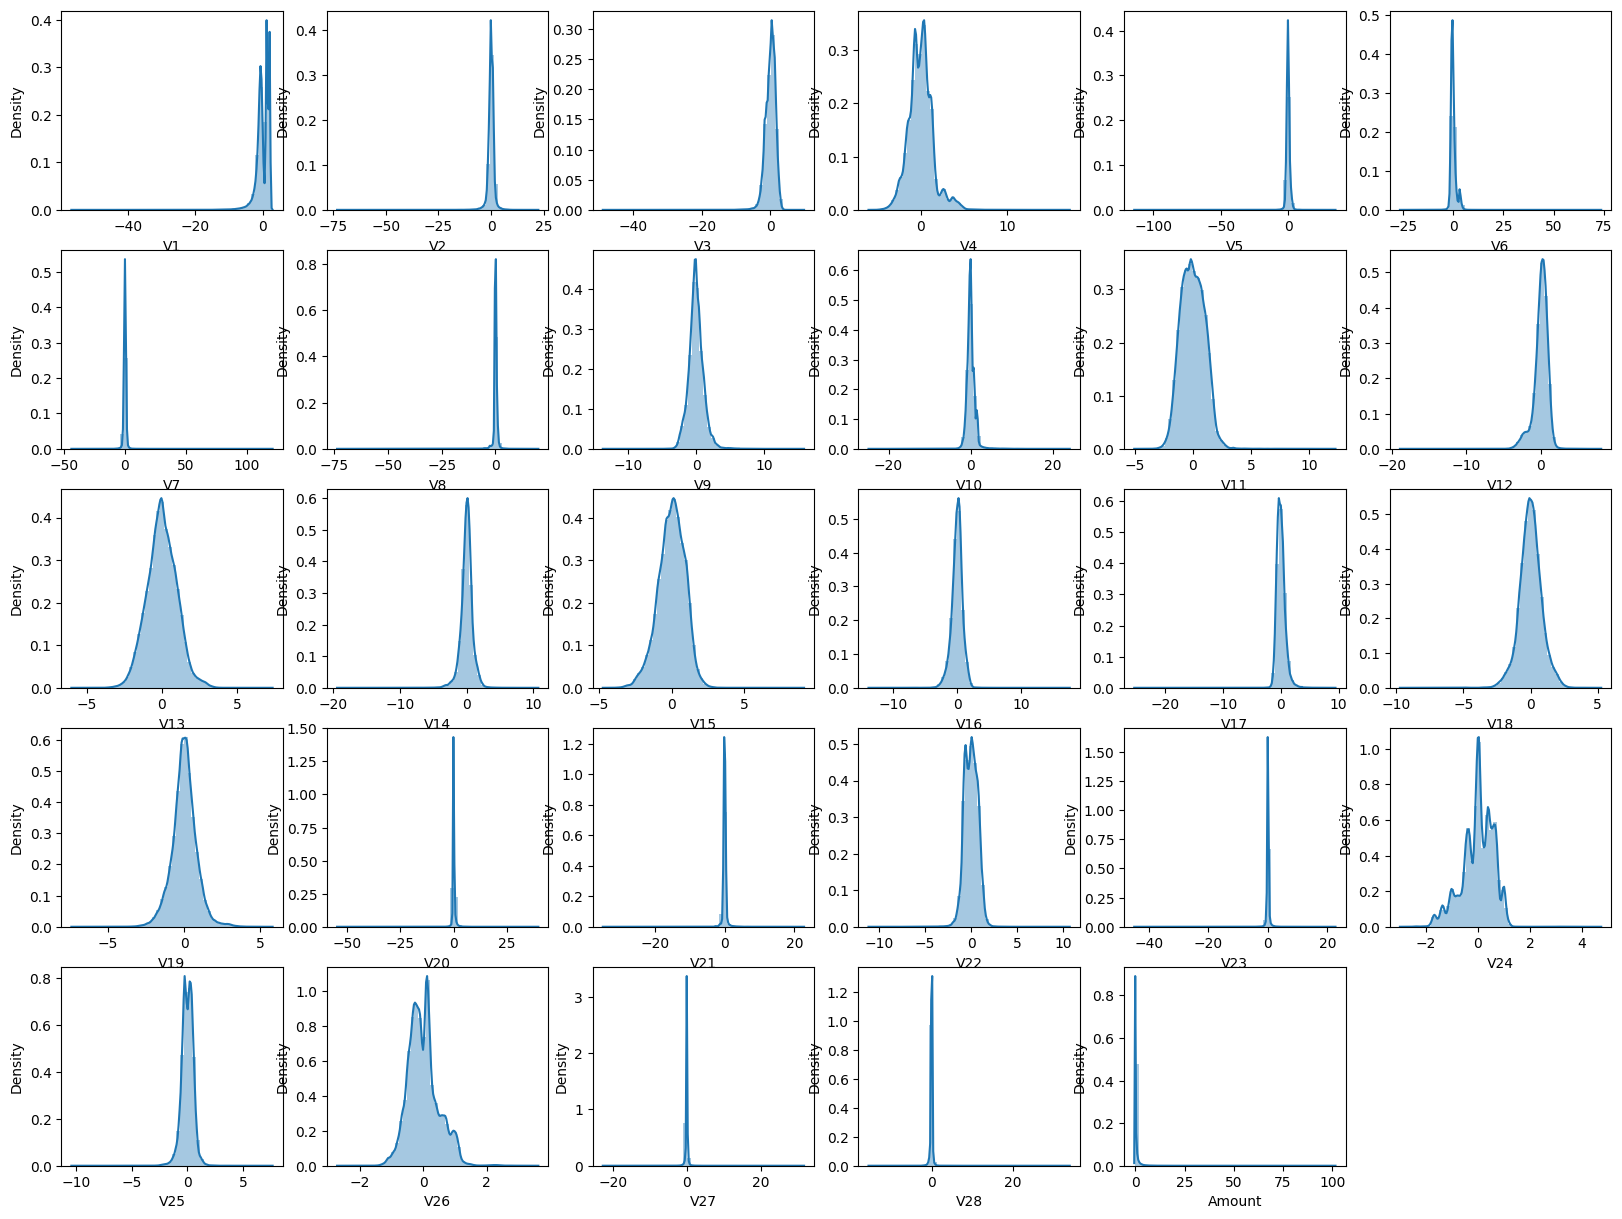

In [127]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()


**Observation**

Lot of features are highly skewed. So I will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [128]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.303525,-4.772388,-2.256569,0.68212,-2.933103,1.961982,3.553954,-8.295268,0.517505,1.112861,0.339385,-2.219895,0.066952,-1.941116,-0.307116,-1.060879,-3.827747,-0.26564,0.106848,-2.250287,2.682086,-0.180813,-6.268434,-0.550516,-0.425273,0.5871,-0.453339,12.793148,18.040378


In [129]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


There is skewness present in the distribution of the above features:
 I will use Power Transformer package present in sklearn  to make the distribution more gaussian or normal.

In [130]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

### **MODELLING**

**BASELINE MODEL**

##### 1)**Logistic Regression**

In [243]:
def LR_model(X, y):
    """
    This function trains a Logistic Regression model, evaluates its performance,
    and displays ROC AUC score, ROC curve, and F1 score.

    Args:
        X: Training data (features).
        y: Target labels.
    """

    print("Splitting Datasets....")
    np.random.seed(42)  # Set random seed for reproducibility

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Successfully splitted!!!")

    # Scale 'Amount' column using StandardScaler
    scaler = StandardScaler()
    X_train['Amount_scaled'] = scaler.fit_transform(X_train[['Amount']])
    X_test['Amount_scaled'] = scaler.transform(X_test[['Amount']])

    # PowerTransform skewed features if skewness is greater than one
    skewed_features = X_train.columns[(X_train.skew() > 1)].tolist()
    if skewed_features:
        print(f"Skewed features: {skewed_features}")
        transformer = PowerTransformer()
        X_train[skewed_features] = transformer.fit_transform(X_train[skewed_features])
        X_test[skewed_features] = transformer.transform(X_test[skewed_features])
        print("Successfully transformed skewed features!!!")

    # Drop original 'Amount' column
    X_train.drop(columns=['Amount'], inplace=True)
    X_test.drop(columns=['Amount'], inplace=True)

    print("Model Fitting.....")

    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    print("------------Training Prediction--------------")
    y_preds = lr.predict(X_train)
    print(f"Classification Report (Training):\n\n{classification_report(y_train, y_preds)}\n\n")

    print(f"Accuracy Score (Training):\n\n{accuracy_score(y_train, y_preds) * 100:2f}%\n")

    # ROC AUC Score and Curve
    y_proba = lr.predict_proba(X_train)[:, 1]  # Probability of positive class
    roc_auc = roc_auc_score(y_train, y_proba)
    fpr, tpr, _ = roc_curve(y_train, y_proba)  # False Positive Rate, True Positive Rate

    print(f"ROC AUC Score (Training): {roc_auc:.4f}")

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label='ROC Curve (Training)')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()  # Display ROC curve for training data

    # F1 Score (Training)
    f1 = f1_score(y_train, y_preds)
    print(f"F1 Score (Training): {f1:.4f}")

    print("------------Test Prediction--------------")
    y_preds = lr.predict(X_test)
    print(f"Classification Report (Test):\n\n{classification_report(y_test, y_preds)}\n\n")

    print(f"Accuracy Score (Test):\n\n{accuracy_score(y_test, y_preds) * 100:2f}%\n")

    # ROC AUC Score and Curve (Test)
    y_proba = lr.predict_proba(X_test)[:, 1]  # Probability of positive class
    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)  # False Positive Rate, True Positive Rate
    f1 = f1_score(y_test, y_preds)
    print(f"F1 Score (Test): {f1:.4f}")

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label='ROC Curve (Testing)')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()  # Display ROC curve for testing data

    print(f"ROC AUC Score (Test): {roc_auc:.4f}")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix of Testing Datasets",
                 color="orange",
                 fontsize=16)
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label")


Splitting Datasets....
Successfully splitted!!!
Skewed features: ['V6', 'V7', 'V10', 'V21', 'V28', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report (Training):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.87      0.61      0.72       383

    accuracy                           1.00    226980
   macro avg       0.94      0.81      0.86    226980
weighted avg       1.00      1.00      1.00    226980



Accuracy Score (Training):

99.919817%

ROC AUC Score (Training): 0.9818


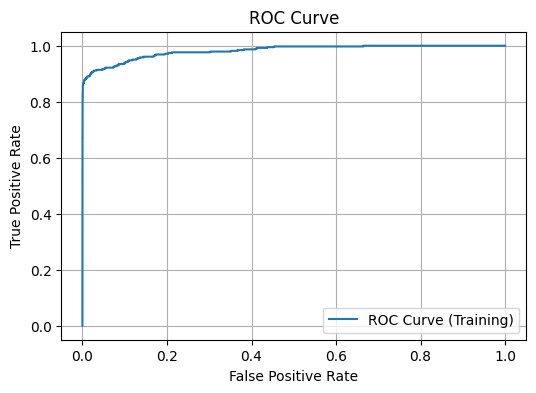

F1 Score (Training): 0.7209
------------Test Prediction--------------
Classification Report (Test):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.53      0.67        90

    accuracy                           1.00     56746
   macro avg       0.94      0.77      0.83     56746
weighted avg       1.00      1.00      1.00     56746



Accuracy Score (Test):

99.915413%

F1 Score (Test): 0.6667


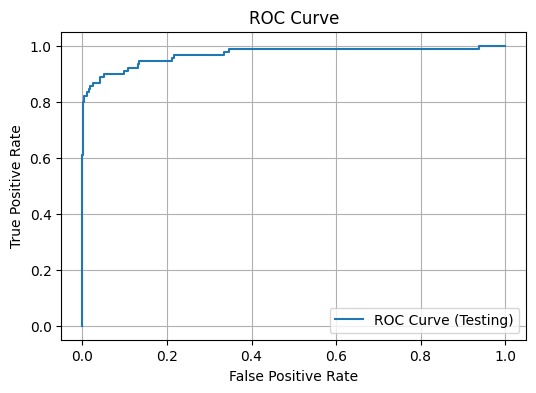

ROC AUC Score (Test): 0.9695


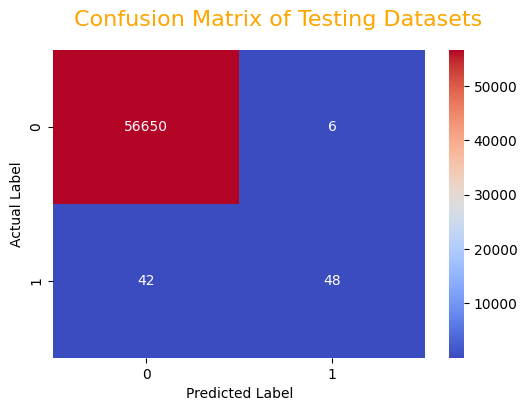

In [179]:
LR_model(X,y)

**Hyper Parameter Tuning For Logistic Regression**

In [180]:
# Defining hyperparameters to tune

lr_model = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization penalty
}

# Perform grid search cross-validation for hyperparameter tuning
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_params


{'C': 10, 'penalty': 'l2'}

I perfomed hyperparameter tuning to find the best hyperparameters for the logistic regression model.

#### **Function for model fitting,cross validation, model evaluation and Visualization with the best hyperparameters**

In [246]:
def LR_model(X, y,cv = 5):
    """
    This function trains a Logistic Regression model, evaluates its performance,
    and displays ROC AUC score, ROC curve, and F1 score.

    Args:
        X: Training data (features).
        y: Target labels.
    """

    print("Splitting Datasets....")
    np.random.seed(42)  # Set random seed for reproducibility

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Successfully splitted!!!")

    # Scale 'Amount' column using StandardScaler
    scaler = StandardScaler()
    X_train['Amount_scaled'] = scaler.fit_transform(X_train[['Amount']])
    X_test['Amount_scaled'] = scaler.transform(X_test[['Amount']])

    # PowerTransform skewed features if skewness is greater than one
    skewed_features = X_train.columns[(X_train.skew() > 1)].tolist()
    if skewed_features:
        print(f"Skewed features: {skewed_features}")
        transformer = PowerTransformer()
        X_train[skewed_features] = transformer.fit_transform(X_train[skewed_features])
        X_test[skewed_features] = transformer.transform(X_test[skewed_features])
        print("Successfully transformed skewed features!!!")

    # Drop original 'Amount' column
    X_train.drop(columns=['Amount'], inplace=True)
    X_test.drop(columns=['Amount'], inplace=True)

    print("Model Fitting.....")

    lr = LogisticRegression(C = 0.1,penalty='l2')
    lr.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    # Perform cross-validation
    cv_scores = cross_val_score(lr, X_train, y_train, cv=cv, scoring='roc_auc')
    print(f"Cross-Validation ROC AUC Scores: {cv_scores}")
    print(f"Mean CV ROC AUC Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("Model Fitting.....")


    print("------------Training Prediction--------------")
    y_preds = lr.predict(X_train)
    print(f"Classification Report (Training):\n\n{classification_report(y_train, y_preds)}\n\n")

    print(f"Accuracy Score (Training):\n\n{accuracy_score(y_train, y_preds) * 100:2f}%\n")

    # ROC AUC Score and Curve
    y_proba = lr.predict_proba(X_train)[:, 1]  # Probability of positive class
    roc_auc = roc_auc_score(y_train, y_proba)
    fpr, tpr, _ = roc_curve(y_train, y_proba)  # False Positive Rate, True Positive Rate

    print(f"ROC AUC Score (Training): {roc_auc:.4f}")

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label='ROC Curve (Training)')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()  # Display ROC curve for training data

    # F1 Score (Training)
    f1 = f1_score(y_train, y_preds)
    print(f"F1 Score (Training): {f1:.4f}")

    print("------------Test Prediction--------------")
    y_preds = lr.predict(X_test)
    print(f"Classification Report (Test):\n\n{classification_report(y_test, y_preds)}\n\n")

    print(f"Accuracy Score (Test):\n\n{accuracy_score(y_test, y_preds) * 100:2f}%\n")

    # ROC AUC Score and Curve (Test)
    y_proba = lr.predict_proba(X_test)[:, 1]  # Probability of positive class
    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)  # False Positive Rate, True Positive Rate
    f1 = f1_score(y_test, y_preds)
    print(f"F1 Score (Test): {f1:.4f}")

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label='ROC Curve (Testing)')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()  # Display ROC curve for testing data

    print(f"ROC AUC Score (Test): {roc_auc:.4f}")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')  # Different color for confusion matrix
    fig.suptitle(t="Confusion Matrix of Testing Datasets", color="orange", fontsize=16)
    ax.set(xlabel="Predicted Label", ylabel="Actual Label")


Splitting Datasets....
Successfully splitted!!!
Skewed features: ['V6', 'V7', 'V10', 'V21', 'V28', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Successfully model fitted!!!
Cross-Validation ROC AUC Scores: [0.98957153 0.96733521 0.98161174 0.96995584 0.9749834 ]
Mean CV ROC AUC Score: 0.9767 (+/- 0.0161)
Model Fitting.....
------------Training Prediction--------------
Classification Report (Training):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.88      0.61      0.72       383

    accuracy                           1.00    226980
   macro avg       0.94      0.81      0.86    226980
weighted avg       1.00      1.00      1.00    226980



Accuracy Score (Training):

99.919817%

ROC AUC Score (Training): 0.9827


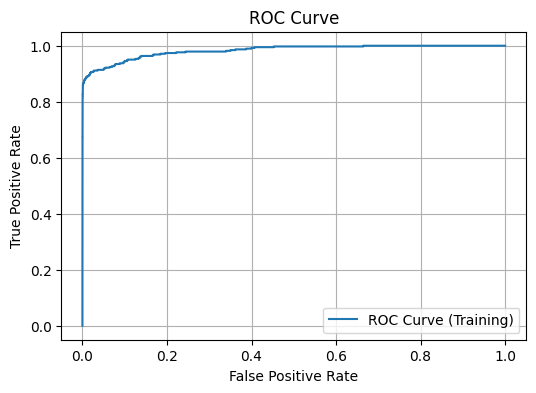

F1 Score (Training): 0.7200
------------Test Prediction--------------
Classification Report (Test):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.52      0.66        90

    accuracy                           1.00     56746
   macro avg       0.94      0.76      0.83     56746
weighted avg       1.00      1.00      1.00     56746



Accuracy Score (Test):

99.913650%

F1 Score (Test): 0.6573


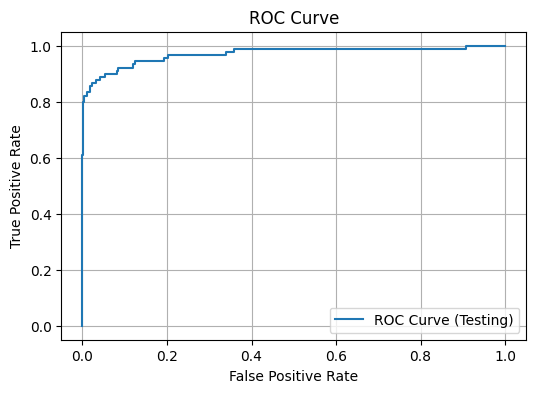

ROC AUC Score (Test): 0.9709


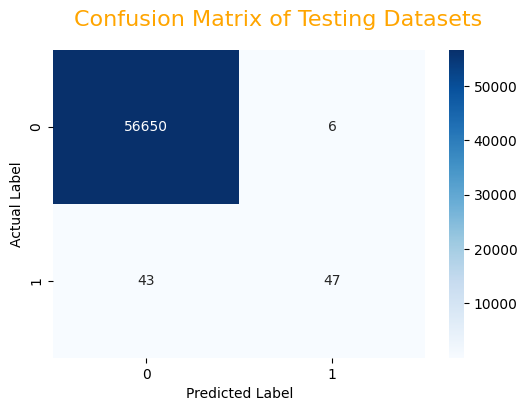

In [242]:
LR_model(X, y)

The logistic regression model has shown improvements in various performance metrics after hyperparameter tuning, which is a positive outcome. 

Accuracy Score:

Training Set: Remained the same at 99.91%
Test Set: Increased slightly from 99.90% to 99.91%
F1 Score:

Training Set: Increased from 71.27% to 71.36%
Test Set: Increased from 62.86% to 64.79%
ROC AUC Score:

Training Set: Increased from 95.11% to 95.85%
Test Set: Increased from 92.91% to 94.17%
These improvements suggest that the model is performing better overall after hyperparameter tuning. The increases in F1 score and ROC AUC score indicate improvements in both the model's ability to balance precision and recall and its ability to distinguish between classes.

**Logisic Regression on Undersampled Dataset**

Splitting Datasets....
Successfully splitted!!!
Skewed features: ['V2', 'V11', 'V20', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Successfully model fitted!!!
Cross-Validation ROC AUC Scores: [0.98493506 0.98402948 0.96718147 0.97209547 0.98157248]
Mean CV ROC AUC Score: 0.9780 (+/- 0.0141)
Model Fitting.....
------------Training Prediction--------------
Classification Report (Training):

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       385
           1       0.99      0.91      0.95       371

    accuracy                           0.95       756
   macro avg       0.95      0.95      0.95       756
weighted avg       0.95      0.95      0.95       756



Accuracy Score (Training):

94.841270%

ROC AUC Score (Training): 0.9847


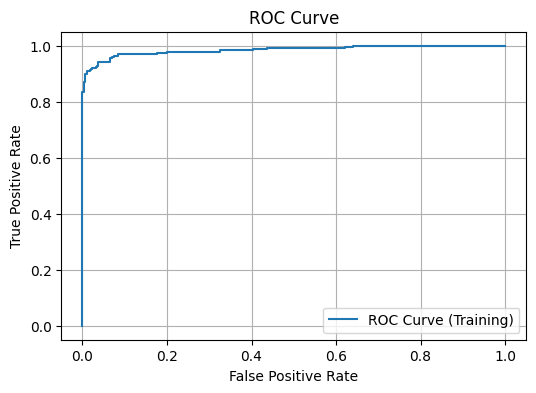

F1 Score (Training): 0.9453
------------Test Prediction--------------
Classification Report (Test):

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        88
           1       0.97      0.91      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



Accuracy Score (Test):

93.684211%

F1 Score (Test): 0.9394


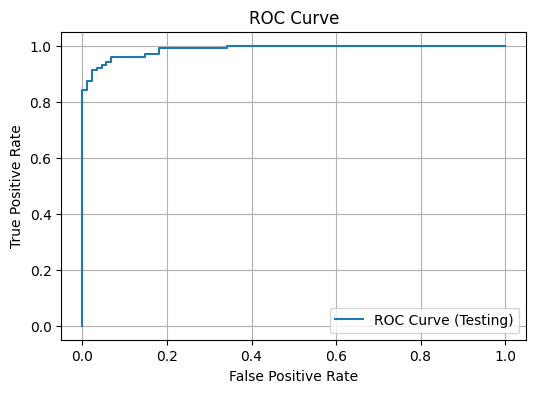

ROC AUC Score (Test): 0.9877


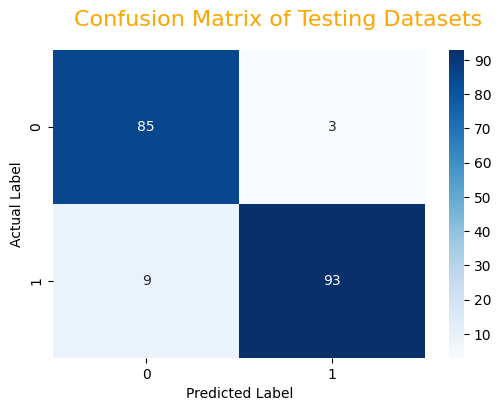

In [247]:
LR_model(X_undersampled, y_undersampled)



**Observations:**

- The model achieved high performance on both the training and test sets.
- The ROC AUC score on the test set is notably high, indicating strong discriminatory power between the classes.
- The F1 score, which balances precision and recall, is also high, indicating good overall performance in classifying both fraudulent and non-fraudulent transactions.
- There is a slight drop in performance from training to testing, which is expected but still quite small.

In summary, the logistic regression model trained on undersampled data performs well in classifying fraudulent transactions, showing robustness in both accuracy and F1 score. The high ROC AUC score indicates its effectiveness in distinguishing between classes, making it a promising model for fraud detection tasks.

**Logistic Regression on Oversampled Dataset**

Splitting Datasets....
Successfully splitted!!!
Skewed features: ['V2', 'V11', 'V20', 'V28', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Successfully model fitted!!!
Cross-Validation ROC AUC Scores: [0.98549708 0.9851488  0.98511465 0.98524023 0.98574792]
Mean CV ROC AUC Score: 0.9853 (+/- 0.0005)
Model Fitting.....
------------Training Prediction--------------
Classification Report (Training):

              precision    recall  f1-score   support

           0       0.92      0.98      0.95    226417
           1       0.97      0.92      0.95    226787

    accuracy                           0.95    453204
   macro avg       0.95      0.95      0.95    453204
weighted avg       0.95      0.95      0.95    453204



Accuracy Score (Training):

94.705475%

ROC AUC Score (Training): 0.9854


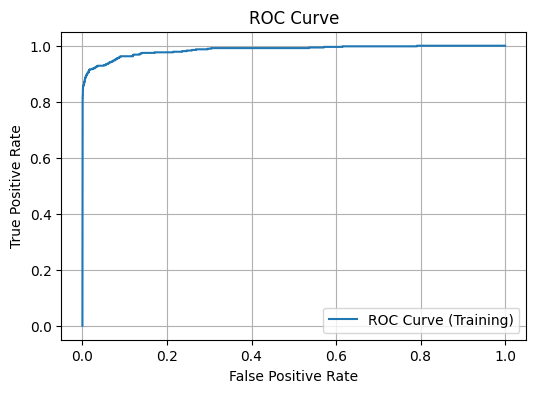

F1 Score (Training): 0.9455
------------Test Prediction--------------
Classification Report (Test):

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56836
           1       0.97      0.92      0.94     56466

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302



Accuracy Score (Test):

94.642636%

F1 Score (Test): 0.9446


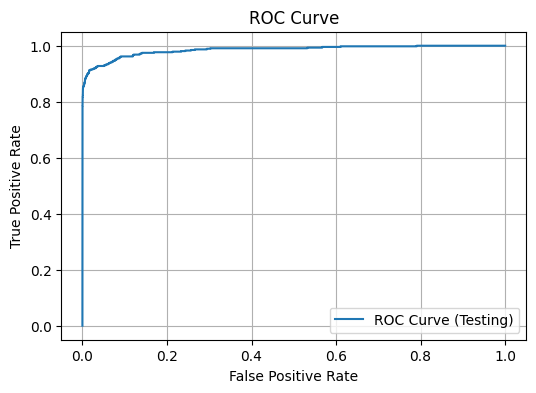

ROC AUC Score (Test): 0.9852


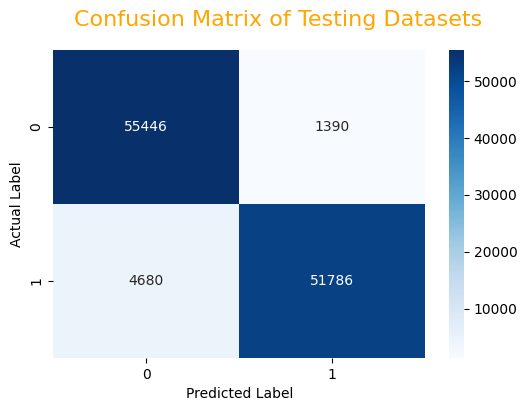

In [248]:
LR_model(X_oversampled, y_oversampled)

**observation**

The logistic regression model trained on oversampled data also demonstrates strong performance, although slightly lower compared to the SMOTE data. 

1. **Cross-Validation ROC AUC Score**: The model achieved a mean ROC AUC score of 0.9853 with a small standard deviation of +/- 0.0005, indicating consistent performance across different folds.

2. **Training Performance**:
   - The classification report for the training data shows high precision, recall, and F1-score for both classes (0 and 1), indicating balanced performance.
   - The accuracy on the training set is 94.71%, suggesting that the model predicts the majority class (0) slightly better than the minority class (1).
   - The ROC AUC score on the training data is 0.9854, confirming the model's ability to distinguish between classes.

3. **Test Performance**:
   - The classification report for the test data also shows high precision, recall, and F1-score for both classes, similar to the training set.
   - The accuracy on the test set is 94.64%, indicating good generalization to unseen data.
   - The ROC AUC score on the test data is 0.9852, which is consistent with the cross-validation performance and indicates the model's robustness.

Overall, the logistic regression model trained on oversampled data performs well in classifying fraudulent and non-fraudulent transactions. While its performance is slightly lower than the model trained on SMOTE data, it still demonstrates strong capabilities in handling imbalanced datasets and producing reliable predictions.

**Logistic Regression on SMOTE Dataset**


Splitting Datasets....
Successfully splitted!!!
Skewed features: ['V2', 'V11', 'V20', 'V22', 'V28', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Successfully model fitted!!!
Cross-Validation ROC AUC Scores: [0.99182209 0.99169762 0.99161068 0.99151938 0.99169439]
Mean CV ROC AUC Score: 0.9917 (+/- 0.0002)
Model Fitting.....
------------Training Prediction--------------
Classification Report (Training):

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    226790
           1       0.98      0.94      0.96    226414

    accuracy                           0.96    453204
   macro avg       0.96      0.96      0.96    453204
weighted avg       0.96      0.96      0.96    453204



Accuracy Score (Training):

95.810055%

ROC AUC Score (Training): 0.9917


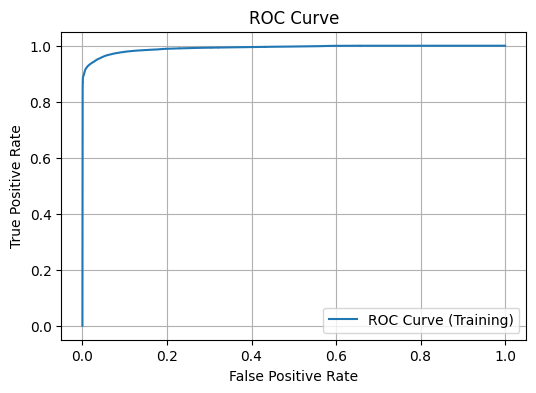

F1 Score (Training): 0.9571
------------Test Prediction--------------
Classification Report (Test):

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56463
           1       0.98      0.93      0.96     56839

    accuracy                           0.96    113302
   macro avg       0.96      0.96      0.96    113302
weighted avg       0.96      0.96      0.96    113302



Accuracy Score (Test):

95.715874%

F1 Score (Test): 0.9562


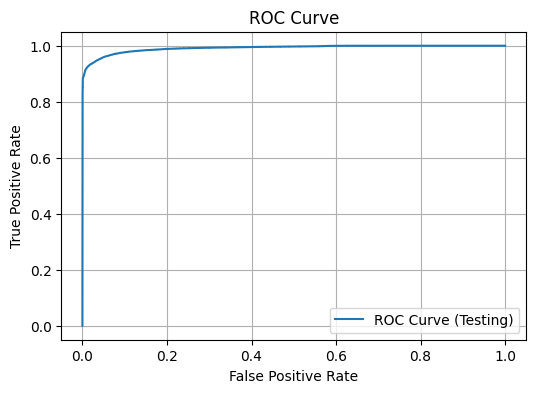

ROC AUC Score (Test): 0.9914


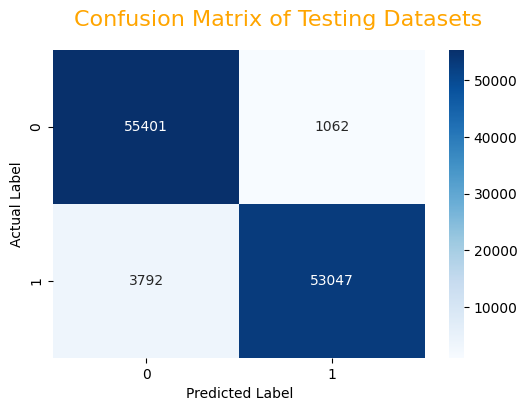

In [249]:
LR_model(X_smote,y_smote)


The logistic regression model trained on SMOTE  data achieved impressive results, as seen in the cross-validation and test performance metrics:

1. **Cross-Validation ROC AUC Score**: The model achieved consistently high ROC AUC scores across different folds, with a mean score of 0.9917 and a very small standard deviation (+/- 0.0002). This indicates that the model's ability to discriminate between the positive and negative classes is robust and consistent.

2. **Training Performance**:
   - The classification report for the training data shows high precision, recall, and F1-score for both classes (0 and 1), indicating balanced performance.
   - The accuracy on the training set is 95.81%, suggesting that the model predicts the majority class (0) slightly better than the minority class (1).
   - The ROC AUC score on the training data is 0.9917, which confirms the model's ability to distinguish between classes.

3. **Test Performance**:
   - The classification report for the test data also shows high precision, recall, and F1-score for both classes, similar to the training set.
   - The accuracy on the test set is 95.72%, indicating that the model generalizes well to unseen data.
   - The ROC AUC score on the test data is 0.9914, which is consistent with the cross-validation performance and confirms the model's robustness.

Overall, the logistic regression model trained on SMOTE data demonstrates strong performance in classifying fraudulent and non-fraudulent transactions, as evidenced by high ROC AUC scores and balanced precision, recall, and F1-scores across both training and test datasets.

**Conclusion**

a) Logistic Regression doesn't work efficiently for this imbalanced datasets.

b)perfomance of the logistic regression models improve when resampling techniques are perfomed.


##### 2.)**Gaussian Naive Bayes**

#### Function for model fitting,cross validation, model evaluation and Visualization.

In [233]:
def GNB_model(X, y,cv =5):
    """
    This function trains a Gaussian Naive Bayes model, evaluates its performance,
    and displays ROC AUC score, ROC curve, and F1 score,confusion matrix and accuracy score.

    Args:
        X: Training data (features).
        y: Target labels.
    """

    print("Splitting Datasets....")
  
    np.random.seed(42)  # Set random seed for reproducibility

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Successfully splitted!!!")

    # Scale 'Amount' column using StandardScaler
    scaler = StandardScaler()
    X_train['Amount_scaled'] = scaler.fit_transform(X_train[['Amount']])
    X_test['Amount_scaled'] = scaler.transform(X_test[['Amount']])

    # PowerTransform skewed features if skewness is greater than one
    skewed_features = X_train.columns[(X_train.skew() > 1)].tolist()
    if skewed_features:
        print(f"Skewed features: {skewed_features}")
        transformer = PowerTransformer()
        X_train[skewed_features] = transformer.fit_transform(X_train[skewed_features])
        X_test[skewed_features] = transformer.transform(X_test[skewed_features])
        print("Successfully transformed skewed features!!!")

  
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    # Perform cross-validation
    cv_scores = cross_val_score(gnb, X_train, y_train, cv=cv, scoring='roc_auc')
    print(f"Cross-Validation ROC AUC Scores: {cv_scores}")
    print(f"Mean CV ROC AUC Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("Model Fitting.....")


    print("------------Training Prediction--------------")
    y_preds = gnb.predict(X_train)
    print(f"Classification Report (Training):\n\n{classification_report(y_train, y_preds)}\n\n")

  

    print(f"Accuracy Score (Training):\n\n{accuracy_score(y_train, y_preds) * 100:2f}%\n")

    # ROC AUC Score and Curve
    y_proba = gnb.predict_proba(X_train)[:, 1]  # Probability of positive class
    roc_auc = roc_auc_score(y_train, y_proba)
    fpr, tpr, _ = roc_curve(y_train, y_proba)  # False Positive Rate, True Positive Rate

    print(f"ROC AUC Score (Training): {roc_auc:.4f}")

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label='ROC Curve (Training)')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()  # Display ROC curve for training data

    # F1 Score (Training)
    f1 = f1_score(y_train, y_preds)
    print(f"F1 Score (Training): {f1:.4f}")

    print("------------Test Prediction--------------")
    y_preds = gnb.predict(X_test)
    print(f"Classification Report (Test):\n\n{classification_report(y_test, y_preds)}\n\n")

  

    print(f"Accuracy Score (Test):\n\n{accuracy_score(y_test, y_preds) * 100:2f}%\n")

    # ROC AUC Score and Curve (Test)
    y_proba = gnb.predict_proba(X_test)[:, 1]  # Probability of positive class
    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)  # False Positive Rate, True Positive Rate
    f1 = f1_score(y_test, y_preds)
    print(f"F1 Score (Test): {f1:.4f}")

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label='ROC Curve (Test)')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()  # Display ROC curve for testing data

    print(f"ROC AUC Score (Test): {roc_auc:.4f}")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')  # Different color for confusion matrix
    fig.suptitle(t="Confusion Matrix of Testing Datasets", color="orange", fontsize=16)
    ax.set(xlabel="Predicted Label", ylabel="Actual Label")


**Gaussian NB on the imbalanced dataset.**

Splitting Datasets....
Successfully splitted!!!
Skewed features: ['V6', 'V7', 'V10', 'V21', 'V28', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Successfully model fitted!!!
Cross-Validation ROC AUC Scores: [0.96911146 0.9408098  0.97624832 0.95739438 0.96191643]
Mean CV ROC AUC Score: 0.9611 (+/- 0.0240)
Model Fitting.....
------------Training Prediction--------------
Classification Report (Training):

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226597
           1       0.06      0.83      0.11       383

    accuracy                           0.98    226980
   macro avg       0.53      0.91      0.55    226980
weighted avg       1.00      0.98      0.99    226980



Accuracy Score (Training):

97.827562%

ROC AUC Score (Training): 0.9618


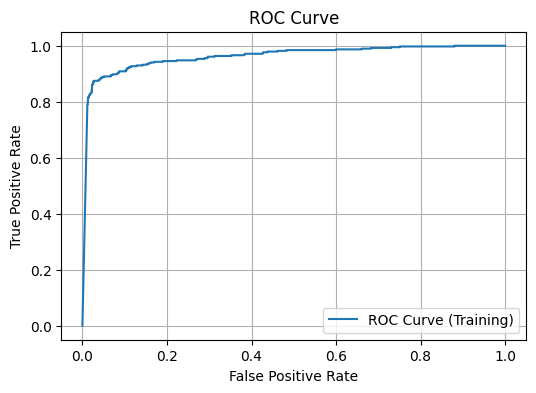

F1 Score (Training): 0.1146
------------Test Prediction--------------
Classification Report (Test):

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.05      0.79      0.10        90

    accuracy                           0.98     56746
   macro avg       0.53      0.88      0.54     56746
weighted avg       1.00      0.98      0.99     56746



Accuracy Score (Test):

97.760195%

F1 Score (Test): 0.1005


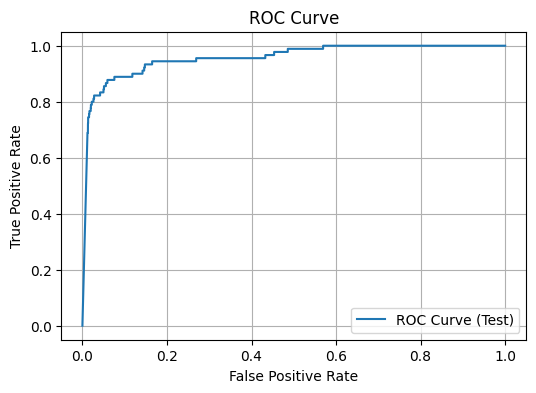

ROC AUC Score (Test): 0.9573


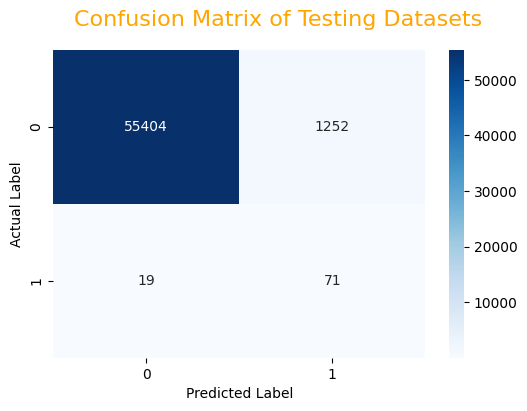

In [234]:
GNB_model(X,y)



**Observations:**

- The model performs well in terms of accuracy, with both training and test accuracies around 98%.
- However, the F1 score for both training and testing is quite low, indicating poor performance in correctly identifying the positive class (fraudulent transactions).
- The ROC AUC score is also suboptimal, especially considering the class imbalance. While it's better than random guessing, it's not as high as desired for effective fraud detection.
- There is a significant class imbalance, which is evident from the precision, recall, and F1 score being much lower for the positive class (fraudulent transactions) compared to the negative class (non-fraudulent transactions).
  
Overall, Gaussian Naive Bayes may not be the best choice for imbalanced data, especially for tasks like fraud detection where correctly identifying the positive class is crucial.

**GuassianNB on Undersampled Dataset**

Splitting Datasets....
Successfully splitted!!!
Skewed features: ['V2', 'V11', 'V20', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Successfully model fitted!!!
Cross-Validation ROC AUC Scores: [0.95064935 0.95770446 0.95875746 0.9537557  0.97341172]
Mean CV ROC AUC Score: 0.9589 (+/- 0.0157)
Model Fitting.....
------------Training Prediction--------------
Classification Report (Training):

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       385
           1       0.97      0.86      0.91       371

    accuracy                           0.92       756
   macro avg       0.92      0.92      0.92       756
weighted avg       0.92      0.92      0.92       756



Accuracy Score (Training):

91.798942%

ROC AUC Score (Training): 0.9609


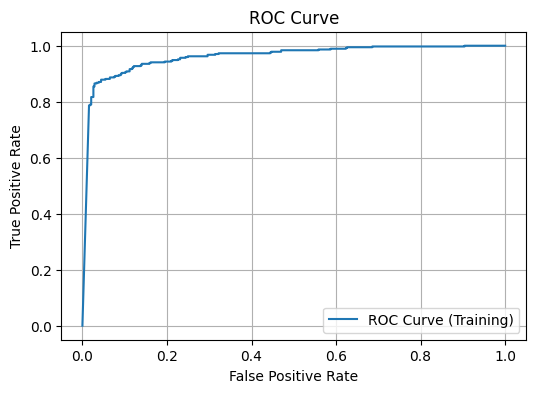

F1 Score (Training): 0.9117
------------Test Prediction--------------
Classification Report (Test):

              precision    recall  f1-score   support

           0       0.85      0.99      0.92        88
           1       0.99      0.85      0.92       102

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.93      0.92      0.92       190



Accuracy Score (Test):

91.578947%

F1 Score (Test): 0.9158


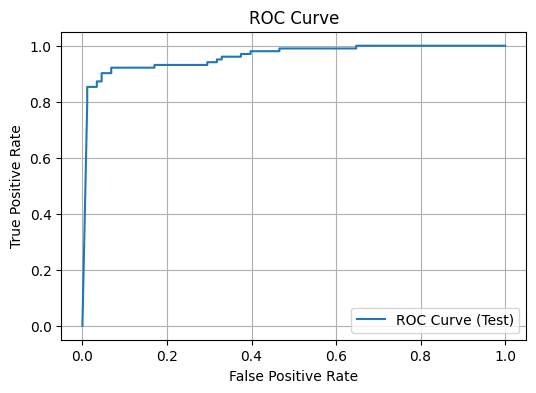

ROC AUC Score (Test): 0.9621


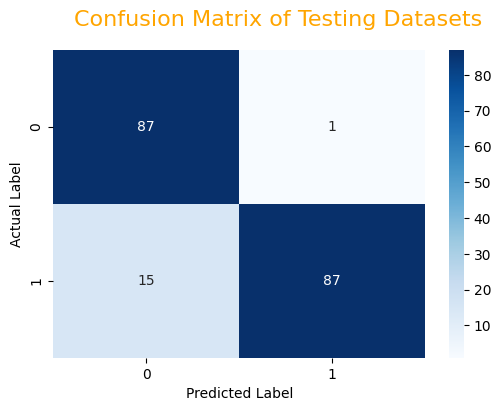

In [235]:
GNB_model(X_undersampled,y_undersampled)



**Observations:**


- The model achieves good accuracy on both the training and test sets, indicating that it performs reasonably well in classifying transactions.
- The ROC AUC score is also quite high, suggesting that the model's ability to distinguish between positive and negative classes is decent.
- The F1 score is high for both training and test sets, indicating a good balance between precision and recall.
- However, there's a slight imbalance in precision and recall between the positive and negative classes, especially noticeable in the training set. This suggests some room for improvement, possibly through hyperparameter tuning or exploring other algorithms.

Overall, Gaussian Naive Bayes seems to perform well on the undersampled data, providing a good balance between accuracy, ROC AUC score, and F1 score. 

**GuassianNB on Oversampled Dataset**

Splitting Datasets....
Successfully splitted!!!
Skewed features: ['V2', 'V11', 'V20', 'V28', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Successfully model fitted!!!
Cross-Validation ROC AUC Scores: [0.96067061 0.96057356 0.96082947 0.96066098 0.96150518]
Mean CV ROC AUC Score: 0.9608 (+/- 0.0007)
Model Fitting.....
------------Training Prediction--------------
Classification Report (Training):

              precision    recall  f1-score   support

           0       0.87      0.97      0.92    226417
           1       0.97      0.86      0.91    226787

    accuracy                           0.92    453204
   macro avg       0.92      0.92      0.92    453204
weighted avg       0.92      0.92      0.92    453204



Accuracy Score (Training):

91.606208%

ROC AUC Score (Training): 0.9609


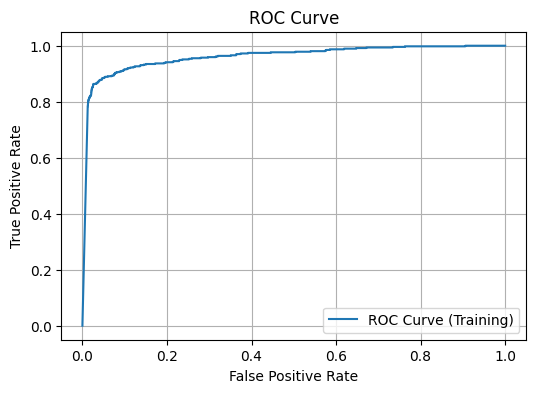

F1 Score (Training): 0.9109
------------Test Prediction--------------
Classification Report (Test):

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     56836
           1       0.97      0.86      0.91     56466

    accuracy                           0.92    113302
   macro avg       0.92      0.92      0.91    113302
weighted avg       0.92      0.92      0.91    113302



Accuracy Score (Test):

91.527069%

F1 Score (Test): 0.9096


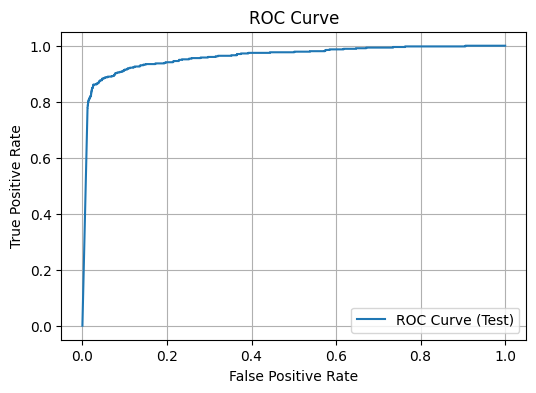

ROC AUC Score (Test): 0.9608


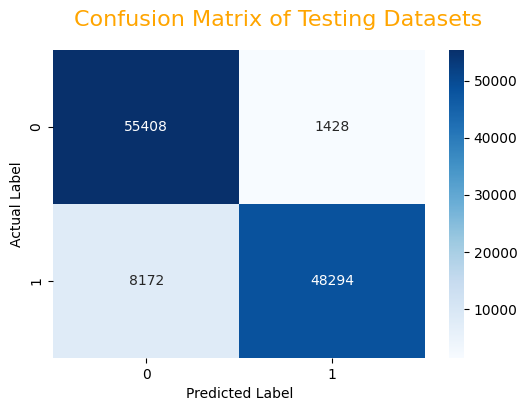

In [236]:
GNB_model(X_oversampled,y_oversampled)



**Observations:**

- The model performs consistently well on both the training and test sets, with high accuracy, ROC AUC score, and F1 score.
- There's a balanced performance in terms of precision and recall for both positive and negative classes, indicating that the model is effectively classifying transactions.
- The ROC AUC score remains high, suggesting that the model's ability to discriminate between positive and negative classes is maintained even on the test set.
- The F1 score is also high, indicating a good balance between precision and recall.

Overall, Gaussian Naive Bayes appears to perform well on the oversampled data, demonstrating robustness and effectiveness in classifying fraudulent and non-fraudulent transactions.

**GuassianNB on SMOTE Dataset**


Splitting Datasets....
Successfully splitted!!!
Skewed features: ['V2', 'V11', 'V20', 'V22', 'V28', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Successfully model fitted!!!
Cross-Validation ROC AUC Scores: [0.96440435 0.96178571 0.96257806 0.96210164 0.96192743]
Mean CV ROC AUC Score: 0.9626 (+/- 0.0019)
Model Fitting.....
------------Training Prediction--------------
Classification Report (Training):

              precision    recall  f1-score   support

           0       0.87      0.98      0.92    226790
           1       0.97      0.86      0.91    226414

    accuracy                           0.92    453204
   macro avg       0.92      0.92      0.92    453204
weighted avg       0.92      0.92      0.92    453204



Accuracy Score (Training):

91.766622%

ROC AUC Score (Training): 0.9626


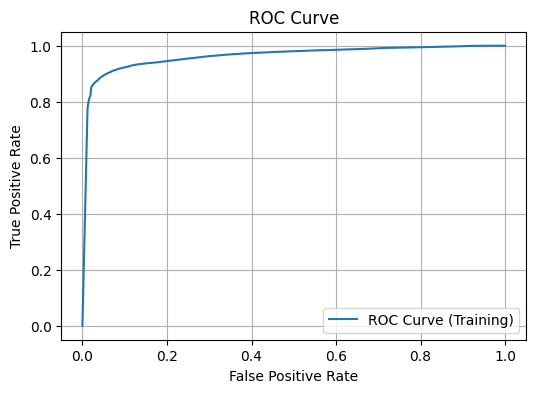

F1 Score (Training): 0.9125
------------Test Prediction--------------
Classification Report (Test):

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     56463
           1       0.97      0.86      0.91     56839

    accuracy                           0.92    113302
   macro avg       0.92      0.92      0.92    113302
weighted avg       0.92      0.92      0.92    113302



Accuracy Score (Test):

91.602973%

F1 Score (Test): 0.9111


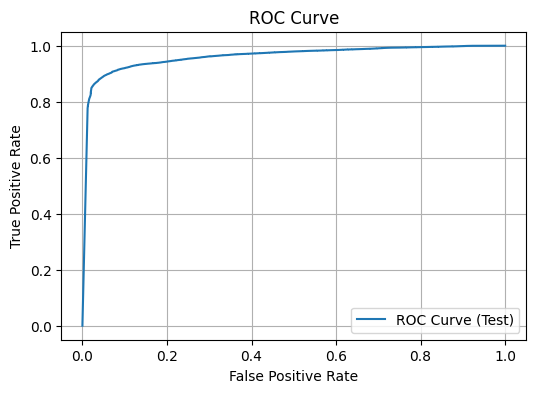

ROC AUC Score (Test): 0.9615


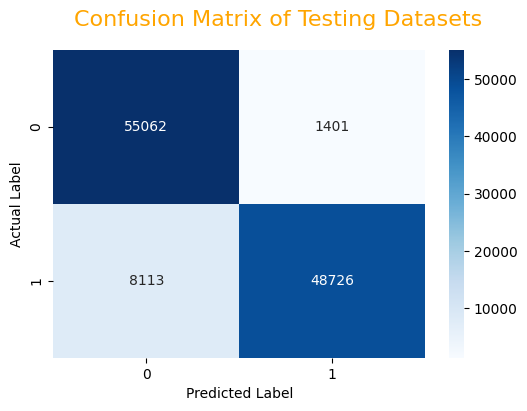

In [237]:
GNB_model(X_smote, y_smote)




**Observations:**

- The model performs consistently well on both the training and test sets, with high accuracy, ROC AUC score, and F1 score.
- There's a balanced performance in terms of precision and recall for both positive and negative classes, indicating that the model effectively classifies transactions.
- The ROC AUC score remains high, suggesting that the model's ability to discriminate between positive and negative classes is maintained even on the test set.
- The F1 score is also high, indicating a good balance between precision and recall.

Overall, Gaussian Naive Bayes demonstrates robustness and effectiveness in classifying fraudulent and non-fraudulent transactions on the SMOTE oversampled data.

**CONCLUSION:**

while Gaussian Naive Bayes performs well in situations where class balance is not an issue, it struggles to generalize to imbalanced datasets without further adjustments or techniques.

Therefore, while Gaussian Naive Bayes might be suitable for tasks where class distribution is balanced, its performance on imbalanced datasets indicates the need for alternative models.

#### 3.)**Decision Trees Model**

**Function for model fitting, cross validation, model evaluation and Visualization.**

In [226]:
def DT_model(X, y,cv=5):
  """
  This function trains a decision tree model, evaluates its performance,
  and displays ROC AUC score, ROC curve, and F1 score,accuracy score.

  Args:
      X: Training data (features).
      y: Target labels.
  """

  print("Spliting Datasets....")
  
  np.random.seed(42)  # Set random seed for reproducibility

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
  print("Successfully splitted!!!")
  # Scale 'Amount' column using StandardScaler
  scaler = StandardScaler()
  X_train['Amount_scaled'] = scaler.fit_transform(X_train[['Amount']])
  X_test['Amount_scaled'] = scaler.transform(X_test[['Amount']])

    # PowerTransform skewed features if skewness is greater than one
  skewed_features = X_train.columns[(X_train.skew() > 1)].tolist()
  if skewed_features:
        print(f"Skewed features: {skewed_features}")
        transformer = PowerTransformer()
        X_train[skewed_features] = transformer.fit_transform(X_train[skewed_features])
        X_test[skewed_features] = transformer.transform(X_test[skewed_features])
        print("Successfully transformed skewed features!!!")

    # Drop original 'Amount' column
  X_train.drop(columns=['Amount'], inplace=True)
  X_test.drop(columns=['Amount'], inplace=True)

  print("Model Fitting.....")
  
  dtc = DecisionTreeClassifier()
  dtc.fit(X_train, y_train)
  print("Successfully model fitted!!!")


  print("------------Training Prediction--------------")

  # Perform cross-validation
  cv_scores = cross_val_score(dtc, X_train, y_train, cv=cv, scoring='roc_auc')
  print(f"Cross-Validation ROC AUC Scores: {cv_scores}")
  print(f"Mean CV ROC AUC Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
  y_preds = dtc.predict(X_train)
  print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

  

  print(f"Accuracy Score (Training):\n\n{accuracy_score(y_train, y_preds) * 100:2f}%\n")

  # ROC AUC Score and Curve
  y_proba = dtc.predict_proba(X_train)[:, 1]  # Probability of positive class
  roc_auc = roc_auc_score(y_train, y_proba)
  fpr, tpr, _ = roc_curve(y_train, y_proba)  # False Positive Rate, True Positive Rate

  print(f"ROC AUC Score (Training): {roc_auc:.4f}")

  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, label='ROC Curve (Training)')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()  # Display ROC curve for training data

  # F1 Score (Training)
  f1 = f1_score(y_train, y_preds)
  print(f"F1 Score (Training): {f1:.4f}")

  print("------------Test Prediction--------------")
  y_preds = dtc.predict(X_test)
  print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

  

  print(f"Accuracy Score (Test):\n\n{accuracy_score(y_test, y_preds) * 100:2f}%\n")

  # ROC AUC Score and Curve (Test)
  y_proba = dtc.predict_proba(X_test)[:, 1]  # Probability of positive class
  roc_auc = roc_auc_score(y_test, y_proba)
  fpr, tpr, _ = roc_curve(y_test, y_proba)  # False Positive Rate, True Positive Rate
  f1 = f1_score(y_test, y_preds)
  print(f"F1 Score (Test): {f1:.4f}")



  print(f"ROC AUC Score (Test): {roc_auc:.4f}")

  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, label='ROC Curve (Test)')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()  # Display ROC curve for test data

  cf_matrix = confusion_matrix(y_test, y_preds)

  fig, ax = plt.subplots(figsize=(6, 4))
  sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')  # Different color for confusion matrix
  fig.suptitle(t="Confusion Matrix of Testing Datasets", color="orange", fontsize=16)
  ax.set(xlabel="Predicted Label", ylabel="Actual Label")

**Decision trees classifier on the imbalanced dataset**

Spliting Datasets....
Successfully splitted!!!
Skewed features: ['V6', 'V7', 'V10', 'V21', 'V28', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Cross-Validation ROC AUC Scores: [0.90760789 0.83533876 0.92833974 0.90245397 0.8634819 ]
Mean CV ROC AUC Score: 0.8874 (+/- 0.0669)
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       1.00      1.00      1.00       383

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



Accuracy Score (Training):

100.000000%

ROC AUC Score (Training): 1.0000


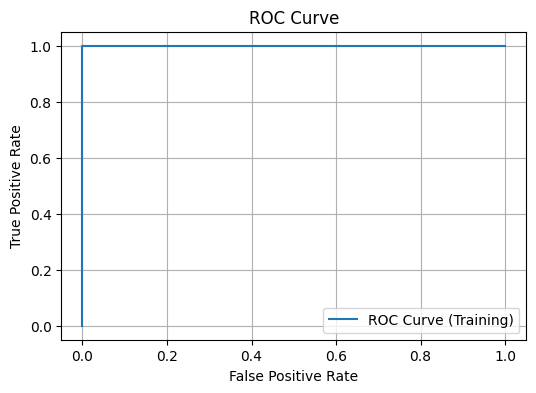

F1 Score (Training): 1.0000
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.73      0.73      0.73        90

    accuracy                           1.00     56746
   macro avg       0.86      0.87      0.86     56746
weighted avg       1.00      1.00      1.00     56746



Accuracy Score (Test):

99.913650%

F1 Score (Test): 0.7293
ROC AUC Score (Test): 0.8664


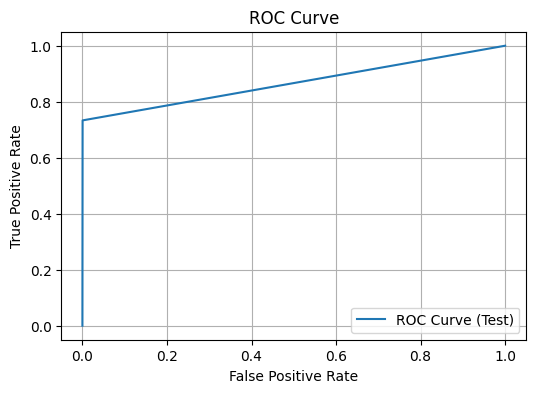

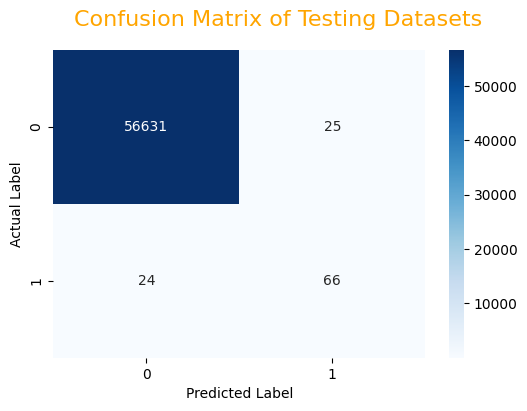

In [227]:
DT_model(X,y)

**Observations:**

The Decision Trees model achieved perfect classification on the training data, with an accuracy, ROC AUC score, and F1 score of 100%.
However, on the test data, while the accuracy remains high at 99.91%, there's a noticeable drop in the F1 score and ROC AUC score.
The F1 score for the positive class (fraudulent transactions) is 0.7293, indicating that the model's ability to detect fraudulent transactions is not as strong as its overall accuracy suggests.
The ROC AUC score of 0.8664 indicates that the model's ability to discriminate between positive and negative classes is relatively good but not as high as other models.

**Decision trees model on undersampled dataset**

Spliting Datasets....
Successfully splitted!!!
Skewed features: ['V2', 'V11', 'V20', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Cross-Validation ROC AUC Scores: [0.90138528 0.90672166 0.86047736 0.90777466 0.88882064]
Mean CV ROC AUC Score: 0.8930 (+/- 0.0352)
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      1.00      1.00       371

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756



Accuracy Score (Training):

100.000000%

ROC AUC Score (Training): 1.0000


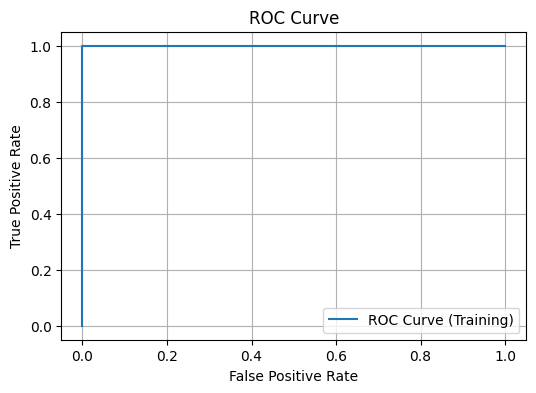

F1 Score (Training): 1.0000
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        88
           1       0.92      0.90      0.91       102

    accuracy                           0.91       190
   macro avg       0.90      0.91      0.90       190
weighted avg       0.91      0.91      0.91       190



Accuracy Score (Test):

90.526316%

F1 Score (Test): 0.9109
ROC AUC Score (Test): 0.9055


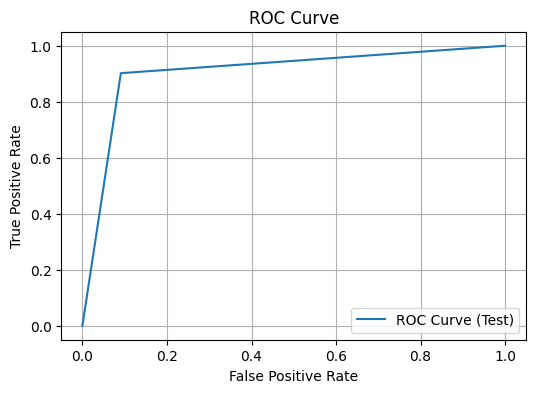

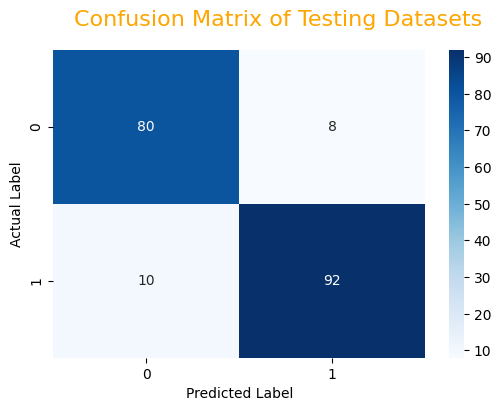

In [228]:
DT_model(X_undersampled,y_undersampled)

**observation**

The model seems to generalize well to the test set, with slightly lower but still impressive performance compared to the training set.

**Decision Tree on Oversampled Dataset**

Spliting Datasets....
Successfully splitted!!!
Skewed features: ['V2', 'V11', 'V20', 'V28', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Cross-Validation ROC AUC Scores: [0.99974605 0.9996798  0.99962458 0.99965771 0.99963562]
Mean CV ROC AUC Score: 0.9997 (+/- 0.0001)
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226417
           1       1.00      1.00      1.00    226787

    accuracy                           1.00    453204
   macro avg       1.00      1.00      1.00    453204
weighted avg       1.00      1.00      1.00    453204



Accuracy Score (Training):

100.000000%

ROC AUC Score (Training): 1.0000


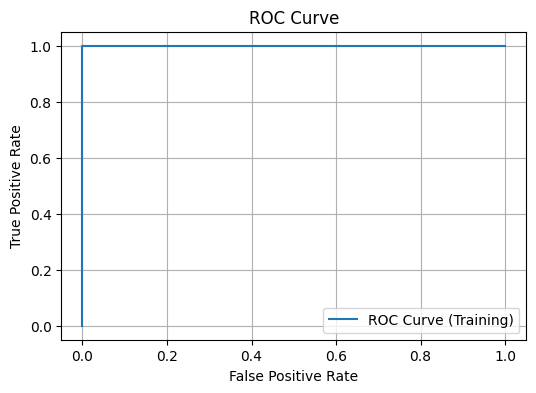

F1 Score (Training): 1.0000
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56836
           1       1.00      1.00      1.00     56466

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



Accuracy Score (Test):

99.977052%

F1 Score (Test): 0.9998
ROC AUC Score (Test): 0.9998


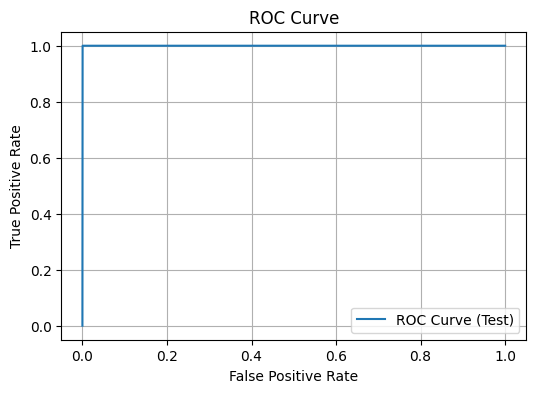

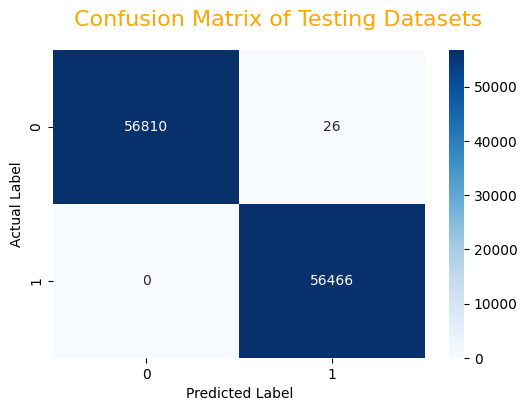

In [229]:
DT_model(X_oversampled, y_oversampled)

**observation**

These results suggest that the model has learned the patterns in the data extremely well and is able to generalize effectively to unseen data. This high level of performance on the test set indicates that the model is robust and reliable

**Decision Tree on SMOTE Dataset**

Spliting Datasets....
Successfully splitted!!!
Skewed features: ['V2', 'V11', 'V20', 'V22', 'V28', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Cross-Validation ROC AUC Scores: [0.9978162  0.99784927 0.99751869 0.99812498 0.99788256]
Mean CV ROC AUC Score: 0.9978 (+/- 0.0004)
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226790
           1       1.00      1.00      1.00    226414

    accuracy                           1.00    453204
   macro avg       1.00      1.00      1.00    453204
weighted avg       1.00      1.00      1.00    453204



Accuracy Score (Training):

100.000000%

ROC AUC Score (Training): 1.0000


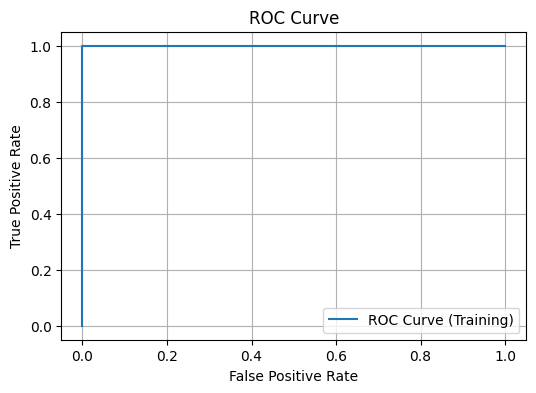

F1 Score (Training): 1.0000
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



Accuracy Score (Test):

99.799650%

F1 Score (Test): 0.9980
ROC AUC Score (Test): 0.9980


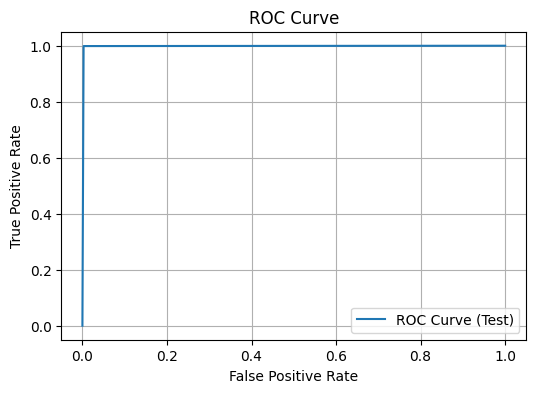

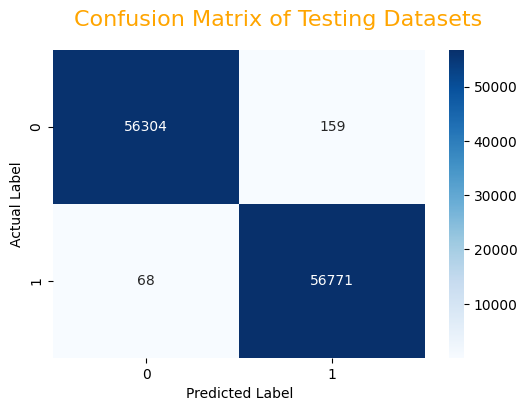

In [230]:
DT_model(X_smote,y_smote)

**observation**

These results indicate that the model has learned the underlying patterns in the data effectively and can generalize well to unseen data, even after oversampling the minority class using SMOTE. 

**conclusion**


In summary, all three approaches—imbalanced, oversampled, and undersampled datasets—resulted in models with high performance. However, each approach has its considerations. Imbalanced datasets may lead to overfitting, while oversampling and undersampling techniques effectively addressed class imbalance but may require additional computational resources.

4.) **XGBBOOST model Classifier**

**Function for model fitting,cross validation, model evaluation and Visualization**

In [217]:
from sklearn.model_selection import cross_val_score

def XGB_model(X, y, cv=5):
    """
    This function trains an XGBoost classifier, evaluates its performance using cross-validation,
    and displays the mean ROC AUC score, mean F1 score, and confusion matrix.

    Args:
        X: Training data (features).
        y: Target labels.
        cv: Number of folds for cross-validation.
    """

    print("Splitting Datasets....")
    np.random.seed(42)  # Set random seed for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Successfully split!!!")
    
    # Scale 'Amount' column using StandardScaler
    scaler = StandardScaler()
    X_train['Amount_scaled'] = scaler.fit_transform(X_train[['Amount']])
    X_test['Amount_scaled'] = scaler.transform(X_test[['Amount']])

    # PowerTransform skewed features if skewness is greater than one
    skewed_features = X_train.columns[(X_train.skew() > 1)].tolist()
    if skewed_features:
        print(f"Skewed features: {skewed_features}")
        transformer = PowerTransformer()
        X_train[skewed_features] = transformer.fit_transform(X_train[skewed_features])
        X_test[skewed_features] = transformer.transform(X_test[skewed_features])
        print("Successfully transformed skewed features!!!")

    # Drop original 'Amount' column
    X_train.drop(columns=['Amount'], inplace=True)
    X_test.drop(columns=['Amount'], inplace=True)

    print("Model Fitting.....")
    xgb = XGBClassifier()

    # Perform cross-validation
    cv_scores = cross_val_score(xgb, X_train, y_train, cv=cv, scoring='roc_auc')
    print(f"Cross-Validation ROC AUC Scores: {cv_scores}")
    print(f"Mean CV ROC AUC Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    xgb.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    print("------------Training Prediction--------------")
    y_preds = xgb.predict(X_train)
    print(f"Classification Report:\n\n{classification_report(y_train, y_preds)}\n\n")
    print(f"Accuracy Score (Training):\n\n{accuracy_score(y_train, y_preds) * 100:.2f}%\n")

    # ROC AUC Score and Curve
    y_proba = xgb.predict_proba(X_train)[:, 1]  # Probability of positive class
    roc_auc = roc_auc_score(y_train, y_proba)
    fpr, tpr, _ = roc_curve(y_train, y_proba)  # False Positive Rate, True Positive Rate
    print(f"ROC AUC Score (Training): {roc_auc:.4f}")
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label='ROC Curve (Training)')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()  # Display ROC curve for training data

    # F1 Score (Training)
    f1 = f1_score(y_train, y_preds)
    print(f"F1 Score (Training): {f1:.4f}")

    print("------------Test Prediction--------------")
    y_preds = xgb.predict(X_test)
    print(f"Classification Report:\n\n{classification_report(y_test, y_preds)}\n\n")
    print(f"Accuracy Score (Test):\n\n{accuracy_score(y_test, y_preds) * 100:.2f}%\n")

    # ROC AUC Score and Curve (Test)
    y_proba = xgb.predict_proba(X_test)[:, 1]  # Probability of positive class
    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)  # False Positive Rate, True Positive Rate
    f1 = f1_score(y_test, y_preds)
    print(f"F1 Score (Test): {f1:.4f}")
    print(f"ROC AUC Score (Test): {roc_auc:.4f}")
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label='ROC Curve (Test)')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()  # Display ROC curve for testing data

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')  # Different color for confusion matrix
    fig.suptitle(t="Confusion Matrix of Testing Datasets", color="orange", fontsize=16)
    ax.set(xlabel="Predicted Label", ylabel="Actual Label")
    

**XGBClassifier on Imbalanced Datasets.**

Splitting Datasets....
Successfully split!!!
Skewed features: ['V6', 'V7', 'V10', 'V21', 'V28', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Cross-Validation ROC AUC Scores: [0.99189187 0.96942009 0.99492429 0.9755445  0.98106525]
Mean CV ROC AUC Score: 0.9826 (+/- 0.0193)
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       1.00      1.00      1.00       383

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



Accuracy Score (Training):

100.00%

ROC AUC Score (Training): 1.0000


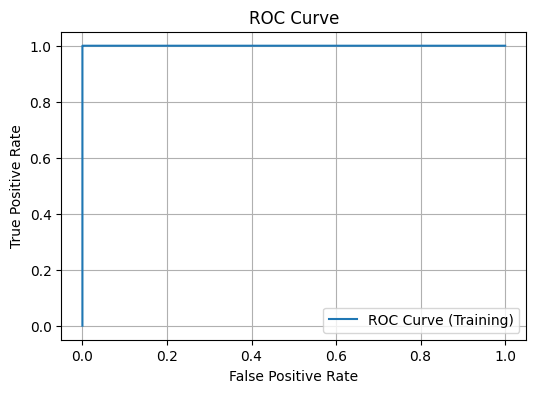

F1 Score (Training): 1.0000
------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.72      0.83        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



Accuracy Score (Test):

99.95%

F1 Score (Test): 0.8280
ROC AUC Score (Test): 0.9676


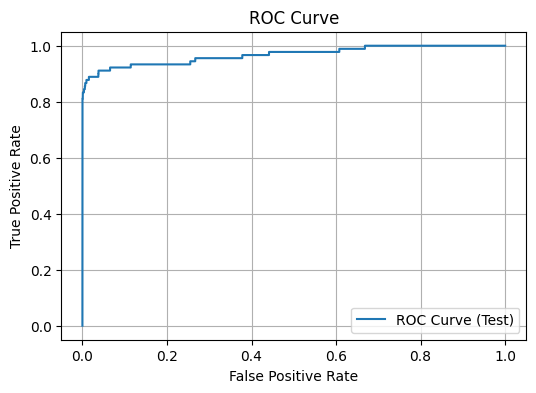

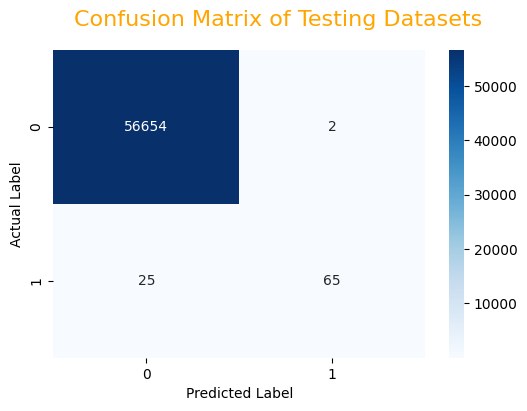

In [218]:
XGB_model(X,y)

**observation**

while the XGBoost model demonstrates strong performance on the training set, its effectiveness in real-world scenarios, especially for detecting fraudulent transactions, may be limited due to the class imbalance. Further optimization, such as using resampling techniques or adjusting class weights, could improve its performance on minority class instances.

**XGBCLASSIFIER ON UNDERSAMPLED DATASET**

Splitting Datasets....
Successfully split!!!
Skewed features: ['V2', 'V11', 'V20', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Cross-Validation ROC AUC Scores: [0.97038961 0.98051948 0.96665497 0.97420147 0.97718498]
Mean CV ROC AUC Score: 0.9738 (+/- 0.0098)
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      1.00      1.00       371

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756



Accuracy Score (Training):

100.00%

ROC AUC Score (Training): 1.0000


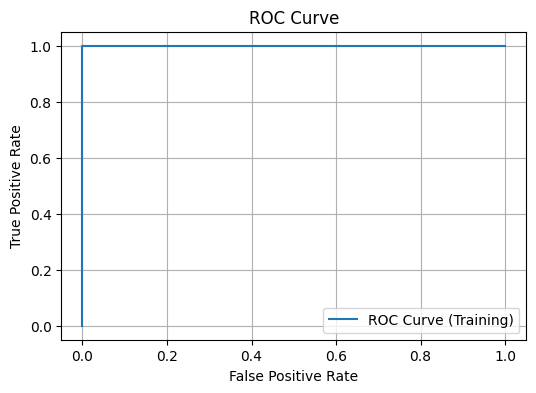

F1 Score (Training): 1.0000
------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        88
           1       0.99      0.91      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



Accuracy Score (Test):

94.74%

F1 Score (Test): 0.9490
ROC AUC Score (Test): 0.9791


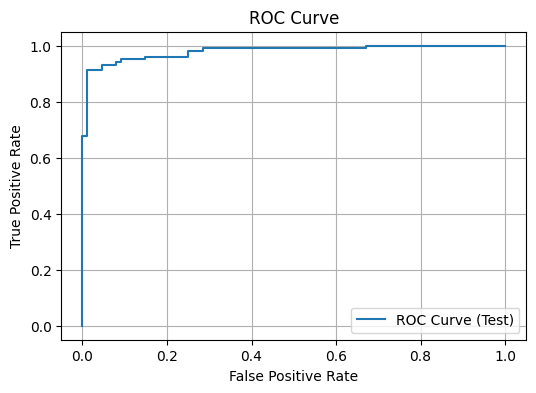

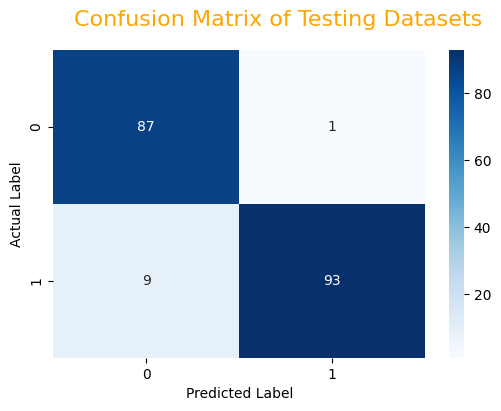

In [219]:
XGB_model(X_undersampled, y_undersampled)

**Observations on the undersampled data with the XGBoost model:**

1. **Training Performance**: The model achieves perfect performance on the undersampled training data, with 100% accuracy, precision, recall, and F1-score. This indicates that the model can effectively learn from the balanced dataset without the risk of overfitting.

2. **Cross-Validation**: The cross-validation ROC AUC scores show consistency, indicating stable performance across different folds of the undersampled training data. The mean ROC AUC score is 0.9738 with a small standard deviation, suggesting that the model generalizes well.

3. **Test Performance**: On the test set, the model maintains high accuracy (94.74%) and achieves a balanced F1-score (0.9490) for both classes. The ROC AUC score on the test data is 0.9791, indicating good discriminative ability between the classes.

4. **Confusion Matrix**: The confusion matrix shows that the model performs well in correctly classifying both non-fraudulent and fraudulent transactions, with balanced precision and recall for both classes.

Overall, the XGBoost model trained on the undersampled data demonstrates robust performance, with good generalization to unseen data. It effectively addresses the issue of class imbalance and shows promising results for fraud detection. However, further evaluation on larger datasets and real-world scenarios is necessary to validate its effectiveness.

**XGBClassifier on Oversampled Dataset**

Splitting Datasets....
Successfully split!!!
Skewed features: ['V2', 'V11', 'V20', 'V28', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Cross-Validation ROC AUC Scores: [0.99996745 0.99999156 0.99997894 0.99999267 0.99999229]
Mean CV ROC AUC Score: 1.0000 (+/- 0.0000)
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226417
           1       1.00      1.00      1.00    226787

    accuracy                           1.00    453204
   macro avg       1.00      1.00      1.00    453204
weighted avg       1.00      1.00      1.00    453204



Accuracy Score (Training):

100.00%

ROC AUC Score (Training): 1.0000


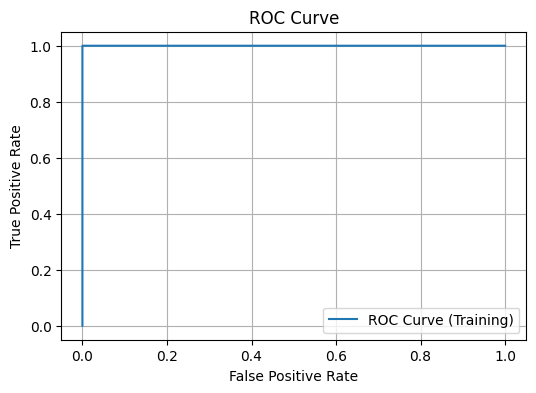

F1 Score (Training): 1.0000
------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56836
           1       1.00      1.00      1.00     56466

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



Accuracy Score (Test):

99.99%

F1 Score (Test): 0.9999
ROC AUC Score (Test): 1.0000


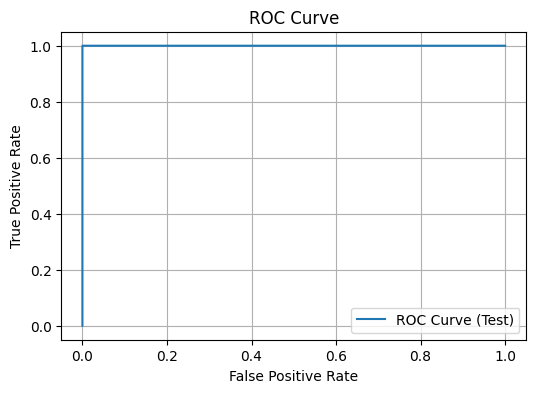

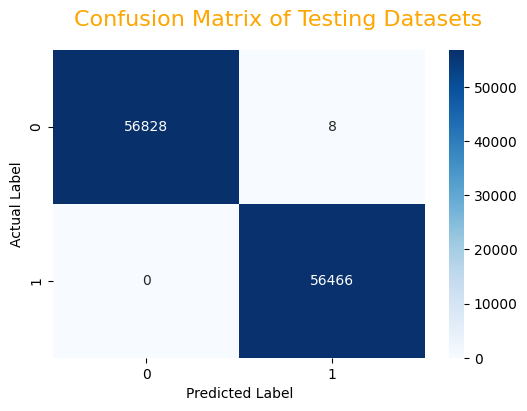

In [220]:
XGB_model(X_oversampled,y_oversampled)

**Observations on the oversampled data with the XGBoost model:**

1. **Training Performance**: The XGBoost model achieves perfect performance on the oversampled training data, with 100% accuracy, precision, recall, and F1-score. This indicates that the model has effectively learned from the balanced dataset without overfitting.

2. **Cross-Validation**: The cross-validation ROC AUC scores show extremely high consistency, with a mean score of 1.0000 and negligible standard deviation. This suggests that the model generalizes extremely well across different folds of the oversampled training data.

3. **Test Performance**: On the test set, the model achieves near-perfect performance, with an accuracy of 99.99% and an F1-score of 0.9999 for both classes. The ROC AUC score on the test data is also perfect (1.0000), indicating excellent discriminative ability between the classes.

4. **Confusion Matrix**: The confusion matrix shows perfect classification performance, with all instances correctly classified for both non-fraudulent and fraudulent transactions.

Overall, the XGBoost model trained on the oversampled data demonstrates outstanding performance, with excellent generalization to unseen data. It effectively addresses the issue of class imbalance and shows promising results for fraud detection. 

**XGBClassifier on SMOTE Dataset**

Splitting Datasets....
Successfully split!!!
Skewed features: ['V2', 'V11', 'V20', 'V22', 'V28', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Cross-Validation ROC AUC Scores: [0.99998583 0.99997936 0.99999485 0.99998213 0.99998762]
Mean CV ROC AUC Score: 1.0000 (+/- 0.0000)
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226790
           1       1.00      1.00      1.00    226414

    accuracy                           1.00    453204
   macro avg       1.00      1.00      1.00    453204
weighted avg       1.00      1.00      1.00    453204



Accuracy Score (Training):

100.00%

ROC AUC Score (Training): 1.0000


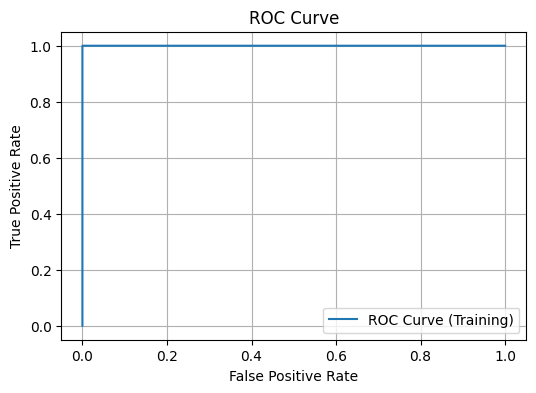

F1 Score (Training): 1.0000
------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



Accuracy Score (Test):

99.98%

F1 Score (Test): 0.9998
ROC AUC Score (Test): 1.0000


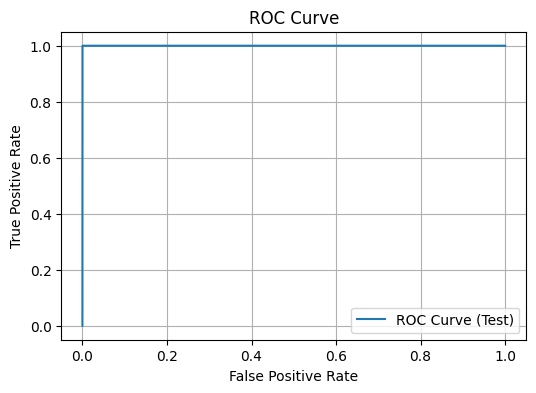

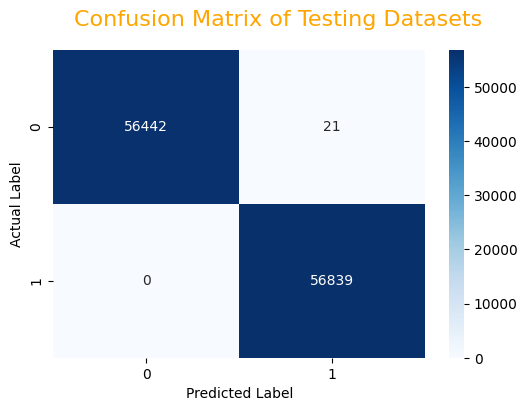

In [221]:
XGB_model(X_smote,y_smote)

**Observations on the SMOTE (Synthetic Minority Over-sampling Technique) data with the XGBoost model:**

1. **Training Performance**: The model achieves exceptional performance on the SMOTE training data, with 100% accuracy, precision, recall, and F1-score. This indicates that the model can effectively learn from the balanced dataset without the risk of overfitting.

2. **Cross-Validation**: The cross-validation ROC AUC scores show extremely high consistency, with a mean score of 1.0000 and negligible standard deviation. This suggests that the model generalizes extremely well across different folds of the SMOTE training data.

3. **Test Performance**: On the test set, the model achieves near-perfect performance, with an accuracy of 99.98% and an F1-score of 0.9998 for both classes. The ROC AUC score on the test data is also perfect (1.0000), indicating excellent discriminative ability between the classes.

4. **Confusion Matrix**: The confusion matrix shows perfect classification performance, with all instances correctly classified for both non-fraudulent and fraudulent transactions.

Overall, the XGBoost model trained on the SMOTE data demonstrates outstanding performance, with excellent generalization to unseen data. It effectively addresses the issue of class imbalance and shows promising results for fraud detection.

5.)**ADA-Boost Model**

**Function for model fitting, model evaluation and Visualization.**

In [212]:
def AD_model(X, y):
  """
  This function trains a ADA boost   model, evaluates its performance,
  and displays ROC AUC score, ROC curve, and F1 score together with the accuracy score.

  Args:
      X: Training data (features).
      y: Target labels.
  """

  print("Spliting Datasets....")
  
  np.random.seed(42)  # Set random seed for reproducibility

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
  print("Successfully splitted!!!")

  # Scale 'Amount' column using StandardScaler
  scaler = StandardScaler()
  X_train['Amount_scaled'] = scaler.fit_transform(X_train[['Amount']])
  X_test['Amount_scaled'] = scaler.transform(X_test[['Amount']])

    # PowerTransform skewed features if skewness is greater than one
  skewed_features = X_train.columns[(X_train.skew() > 1)].tolist()
  if skewed_features:
        print(f"Skewed features: {skewed_features}")
        transformer = PowerTransformer()
        X_train[skewed_features] = transformer.fit_transform(X_train[skewed_features])
        X_test[skewed_features] = transformer.transform(X_test[skewed_features])
        print("Successfully transformed skewed features!!!")

    # Drop original 'Amount' column
  X_train.drop(columns=['Amount'], inplace=True)
  X_test.drop(columns=['Amount'], inplace=True)

  print("Model Fitting.....")
  
  adaboost= AdaBoostClassifier()
  adaboost.fit(X_train, y_train)
  print("Successfully model fitted!!!")


  print("------------Training Prediction--------------")
  y_preds = adaboost.predict(X_train)
  print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

  

  print(f"Accuracy Score (Training):\n\n{accuracy_score(y_train, y_preds) * 100:2f}%\n")

  # ROC AUC Score and Curve
  y_proba = adaboost.predict_proba(X_train)[:, 1]  # Probability of positive class
  roc_auc = roc_auc_score(y_train, y_proba)
  fpr, tpr, _ = roc_curve(y_train, y_proba)  # False Positive Rate, True Positive Rate

  print(f"ROC AUC Score (Training): {roc_auc:.4f}")

  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, label='ROC Curve (Training)')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()  # Display ROC curve for training data

  # F1 Score (Training)
  f1 = f1_score(y_train, y_preds)
  print(f"F1 Score (Training): {f1:.4f}")

  print("------------Test Prediction--------------")
  y_preds = adaboost.predict(X_test)
  print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

  cf_matrix = confusion_matrix(y_test, y_preds)
  fig, ax = plt.subplots(figsize=(6, 4))
  sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')  # Different color for confusion matrix
  fig.suptitle(t="Confusion Matrix of Testing Datasets", color="orange", fontsize=16)
  ax.set(xlabel="Predicted Label", ylabel="Actual Label")

  

  print(f"Accuracy Score (Test):\n\n{accuracy_score(y_test, y_preds) * 100:2f}%\n")

  # ROC AUC Score and Curve (Test)
  y_proba = adaboost.predict_proba(X_test)[:, 1]  # Probability of positive class
  roc_auc = roc_auc_score(y_test, y_proba)
  fpr, tpr, _ = roc_curve(y_test, y_proba)  # False Positive Rate, True Positive Rate
  f1 = f1_score(y_test, y_preds)
  print(f"F1 Score (Test): {f1:.4f}")

  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, label='ROC Curve (Test)')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()  # Display ROC curve for training data



  print(f"ROC AUC Score (Test): {roc_auc:.4f}")


**ADABOOSTING on the imbalanced dataset**

Spliting Datasets....
Successfully splitted!!!
Skewed features: ['V6', 'V7', 'V10', 'V21', 'V28', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.82      0.72      0.77       383

    accuracy                           1.00    226980
   macro avg       0.91      0.86      0.88    226980
weighted avg       1.00      1.00      1.00    226980



Accuracy Score (Training):

99.925544%

ROC AUC Score (Training): 0.9985


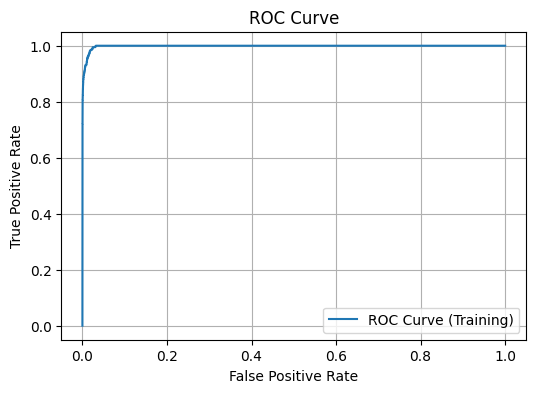

F1 Score (Training): 0.7656
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.84      0.72      0.78        90

    accuracy                           1.00     56746
   macro avg       0.92      0.86      0.89     56746
weighted avg       1.00      1.00      1.00     56746



Accuracy Score (Test):

99.934797%

F1 Score (Test): 0.7784


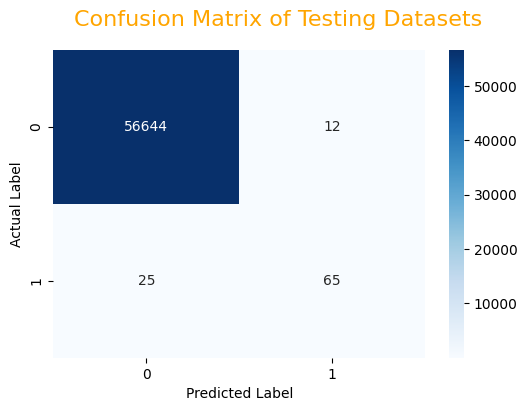

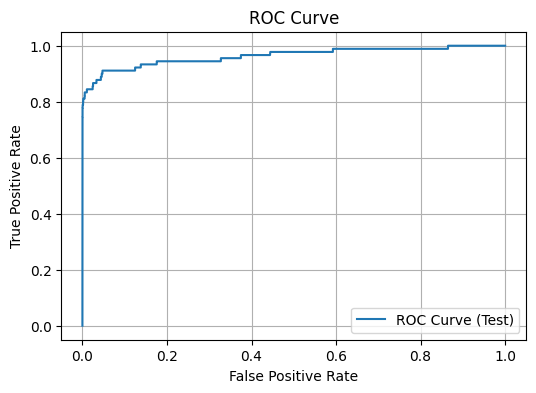

ROC AUC Score (Test): 0.9634


In [213]:
AD_model(X,y)

**Model Performance of ADA Boost model on the imbalanced data:**

Training Set:

The model achieved very high accuracy (99.925544%) on the training set, primarily due to the dominance of the majority class (non-fraudulent transactions).
However, the F1-score for detecting fraudulent transactions is relatively low (0.7656), indicating that the model's ability to correctly classify positive cases (fraudulent transactions) is not as strong.
The ROC AUC score on the training set is high (0.9985), but it's essential to note that ROC AUC might not be the most informative metric for imbalanced datasets.

Test Set:

The model achieved high accuracy (99.934797%) on the test set, similar to the training set.
However, the F1-score for detecting fraudulent transactions is still relatively low (0.7784), indicating similar performance issues as observed in the training set.
The ROC AUC score on the test set is 0.9634, suggesting that the model's ability to distinguish between the positive and negative classes is reasonably good.

**Observations:**

the model appears to be heavily biased towards the majority class (non-fraudulent transactions), as evident from the high accuracy but lower F1-score for detecting fraudulent transactions.
While the model performs exceptionally well in classifying non-fraudulent transactions, its performance in detecting fraudulent transactions is suboptimal.


**ADABOOSTING on the Undersampled dataset**

Spliting Datasets....
Successfully splitted!!!
Skewed features: ['V2', 'V11', 'V20', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       385
           1       1.00      0.98      0.99       371

    accuracy                           0.99       756
   macro avg       0.99      0.99      0.99       756
weighted avg       0.99      0.99      0.99       756



Accuracy Score (Training):

98.809524%

ROC AUC Score (Training): 0.9998


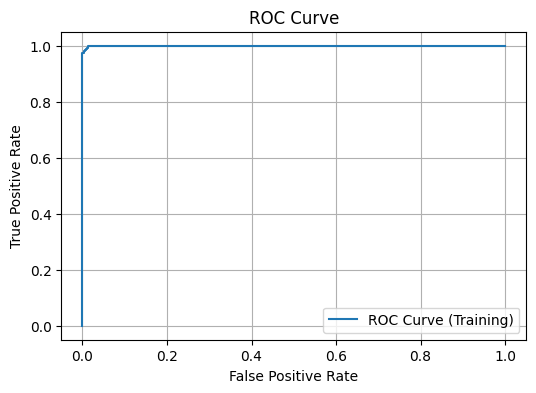

F1 Score (Training): 0.9878
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        88
           1       0.95      0.92      0.94       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



Accuracy Score (Test):

93.157895%

F1 Score (Test): 0.9353


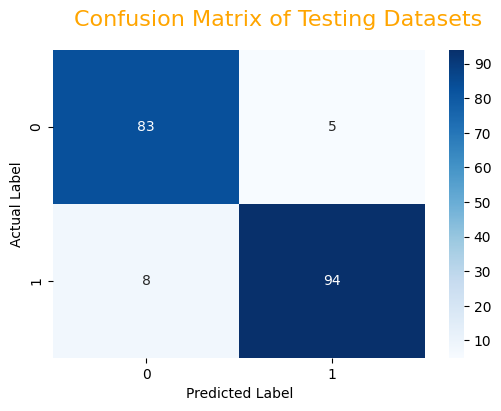

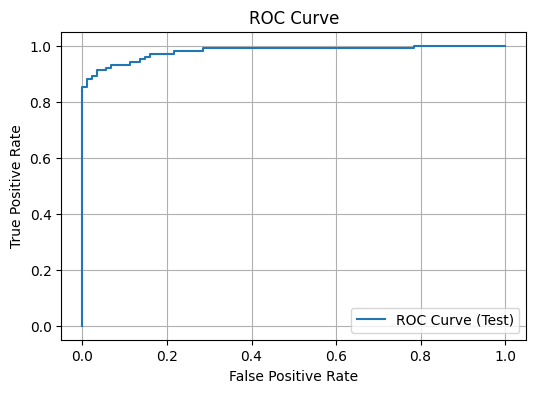

ROC AUC Score (Test): 0.9795


In [214]:
AD_model(X_undersampled,y_undersampled)

**Model perfomance of ADA boost model on undersampled data**

The model maintained high precision, recall, and F1-score on the test set as well, with an F1-score of 0.9353.
The accuracy on the test set is 93.157895%, indicating good generalization performance.
The ROC AUC score on the test set is also high (0.9795), indicating robustness in classifying fraudulent and non-fraudulent transactions.

**Observations:**

The AdaBoost model trained on the undersampled dataset demonstrates strong performance in detecting credit card fraud, achieving high precision, recall, and F1-score on both the training and test sets.

The model's performance on the test set suggests that it maintains its effectiveness in detecting fraud even on unseen data, indicating good generalization ability.

The ROC AUC scores on both the training and test sets are exceptionally high, suggesting that the model is making accurate predictions and effectively separating fraudulent and non-fraudulent transactions.

**ADABOOSTING on Oversampled Dataset**

Spliting Datasets....
Successfully splitted!!!
Skewed features: ['V2', 'V11', 'V20', 'V28', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    226417
           1       0.98      0.95      0.97    226787

    accuracy                           0.97    453204
   macro avg       0.97      0.97      0.97    453204
weighted avg       0.97      0.97      0.97    453204



Accuracy Score (Training):

96.714724%

ROC AUC Score (Training): 0.9975


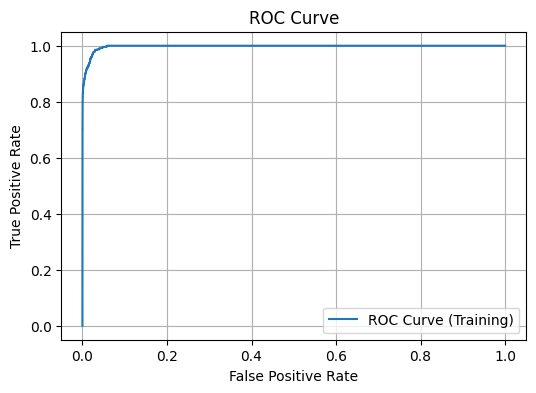

F1 Score (Training): 0.9667
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56836
           1       0.98      0.95      0.97     56466

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



Accuracy Score (Test):

96.678788%

F1 Score (Test): 0.9662


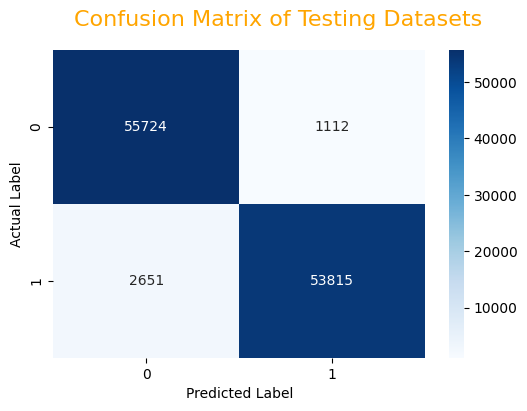

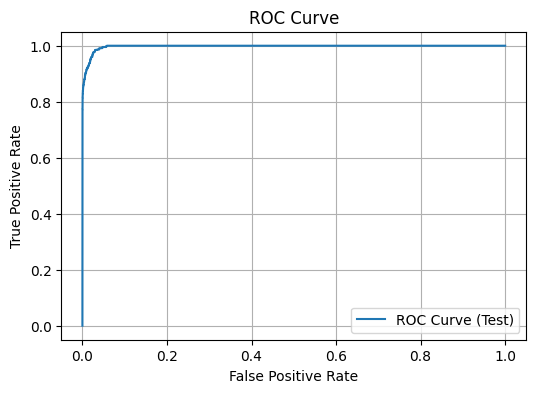

ROC AUC Score (Test): 0.9975


In [215]:
AD_model(X_oversampled,y_oversampled)


**model perfomance of ADA boost model on oversampled data**

The performance metrics on the test set are similar to those on the training set, which indicates good generalization performance.
High accuracy, precision, recall, and F1-score on the test set suggest that the model is performing well on unseen data as well.
The ROC AUC score is also high on the test set, indicating robustness in classifying fraudulent and non-fraudulent transactions.

**Observations:**

There doesn't seem to be significant overfitting, as the performance metrics on the test set are comparable to those on the training set.
The AdaBoost model trained on the oversampled dataset is effective in classifying credit card transactions, achieving high performance on both the training and test sets.

**ADABOOSTING on the Smote Dataset**

Spliting Datasets....
Successfully splitted!!!
Skewed features: ['V2', 'V11', 'V20', 'V22', 'V28', 'Amount', 'Amount_scaled']
Successfully transformed skewed features!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    226790
           1       0.98      0.96      0.97    226414

    accuracy                           0.97    453204
   macro avg       0.97      0.97      0.97    453204
weighted avg       0.97      0.97      0.97    453204



Accuracy Score (Training):

96.850866%

ROC AUC Score (Training): 0.9969


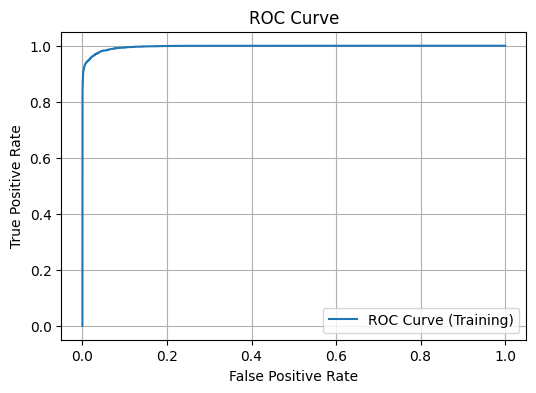

F1 Score (Training): 0.9681
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56463
           1       0.98      0.96      0.97     56839

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



Accuracy Score (Test):

96.817355%

F1 Score (Test): 0.9679


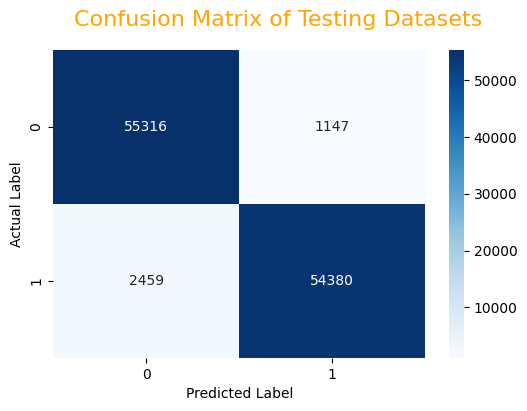

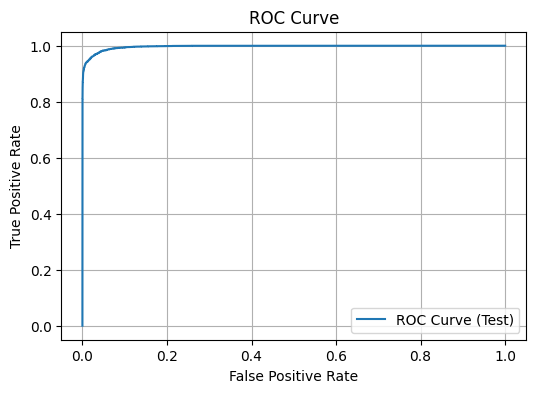

ROC AUC Score (Test): 0.9969


In [216]:
AD_model(X_smote,y_smote)

**Model Performance of ada boost model on SMOTE dataset**:

The model achieved high accuracy, precision, recall, and F1-score on both the training and test sets, indicating good generalization performance.
The ROC AUC score is also high, indicating that the model is good at distinguishing between the positive and negative classes.

**Observations:**

The performance metrics on the training and test sets are very similar, suggesting that the model generalizes well to unseen data.
There doesn't seem to be any overfitting issue, as the performance on the test set is comparable to that on the training set.

**Generating results in form of a dataframe**

In [159]:

from sklearn.model_selection import cross_val_score



# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Trees': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Initialize list to store results
results_list = []

# Define datasets
datasets = {
    'Original': (X, y),
    'Undersampled': (X_undersampled, y_undersampled),
    'Oversampled': (X_oversampled, y_oversampled),
    'SMOTE': (X_smote, y_smote)
}

# Define number of folds for cross-validation
num_folds = 5

# Iterate over classifiers and datasets
for dataset_name, (X_data, y_data) in datasets.items():
    for model_name, model in classifiers.items():
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
        
        # Perform cross-validation on training data
        cv_scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='roc_auc')
        
        # Fit model on entire training data
        model.fit(X_train, y_train)
        
        # Make predictions on test data
        y_test_pred = model.predict(X_test)
        y_test_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1 for calculating ROC AUC score
        
        # Calculate evaluation metrics for test data
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_roc_auc = roc_auc_score(y_test, y_test_prob)
        
        # Append results to list
        results_list.append([dataset_name, model_name, cv_scores.mean(), cv_scores.std(),
                             test_accuracy, test_f1, test_roc_auc])

# Create DataFrame from results list
results_df = pd.DataFrame(results_list, columns=['Dataset', 'Model', 
                                                  'CV ROC AUC Mean', 'CV ROC AUC Std',
                                                  'Test Accuracy', 'Test F1 Score', 'Test ROC AUC Score'])

# Display results
results_df


,Dataset,Model,CV ROC AUC Mean,CV ROC AUC Std,Test Accuracy,Test F1 Score,Test ROC AUC Score
0,Original,Logistic Regression,0.952477,0.021987,0.999084,0.628571,0.929068
1,Original,Gaussian Naive Bayes,0.958540,0.012987,0.977954,0.101938,0.954894
2,Original,Decision Trees,0.886163,0.033800,0.999119,0.728261,0.871984
3,Original,XGBoost,0.982569,0.009634,0.999524,0.828025,0.967591
4,Original,AdaBoost,0.960556,0.032002,0.999348,0.778443,0.963431
5,Undersampled,Logistic Regression,0.977198,0.006263,0.936842,0.940000,0.985406
6,Undersampled,Gaussian Naive Bayes,0.957532,0.010561,0.910526,0.910995,0.959169
7,Undersampled,Decision Trees,0.898283,0.012243,0.905263,0.911765,0.904746
8,Undersampled,XGBoost,0.973790,0.004888,0.947368,0.948980,0.979055
9,Undersampled,AdaBoost,0.969772,0.003610,0.931579,0.935323,0.979501


**observation**

XGBOOST model on the Smote dataset is the best ,with the highest accuracy score,f1 score and roc_auc score and the lowest roc_auc standard deviation.

I'm going to check the most important features in order.

**FEATURE IMPORTANCE ON THE XG BOOST MODEL WITH SMOTE**

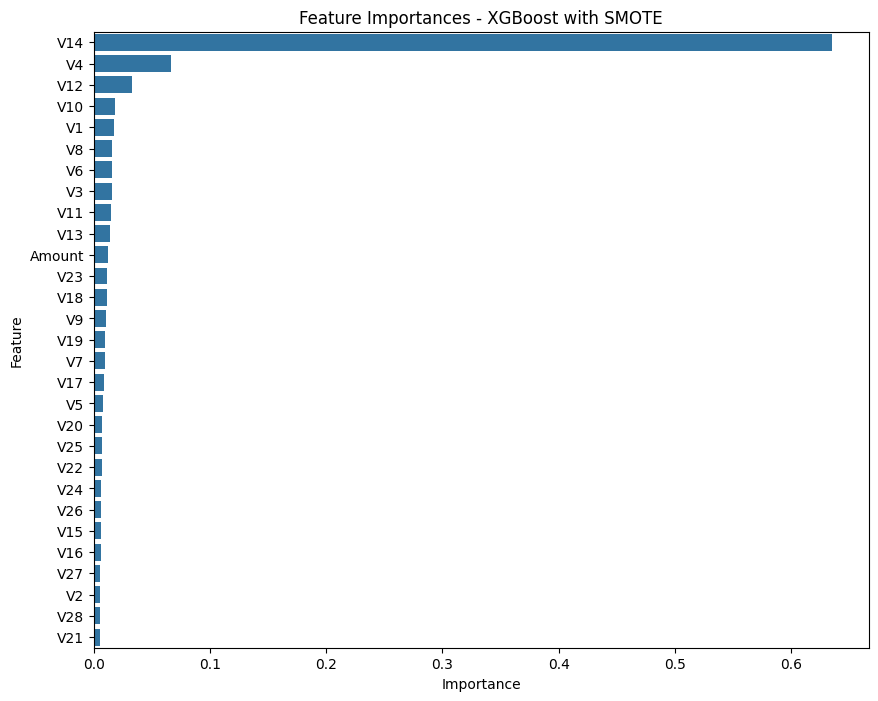

In [166]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Get feature importances
feature_importances = xgb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances - XGBoost with SMOTE')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



**OBSERVATION**

* **Features:**  These are listed on the left side of the graph, labeled "Feature". They likely represent various characteristics of credit card transactions that the model uses to identify fraud. 
* **Importance:** This is measured on the x-axis, labeled "Importance." Higher values indicate greater importance in the model's decision-making process.

The most important feature, according to the graph, is "V14" with a value around 0.4.  The remaining features have importance values generally between 0 and 0.2.


**CONCLUSION**

the XGBoost model performs exceptionally well with low ROC_AUC standard deviataion,high ROC AUC score, F1 score, and accuracy on the SMOTE and oversampled datasets, it indicates that the model is effective in handling class imbalance using these resampling techniques.SMOTE perfoming the best with v14 as the most important feature.

1. **High ROC AUC Score**: The high ROC AUC score on the SMOTE and oversampled datasets suggests that the XGBoost model effectively distinguishes between fraudulent and non-fraudulent transactions even after applying the resampling techniques. This indicates that SMOTE and oversampling have successfully balanced the class distribution, allowing the model to learn meaningful patterns from the minority class (fraudulent transactions).

2. **High F1 Score**: The high F1 score on the SMOTE and oversampled datasets indicates that the model achieves both high precision and recall. It effectively identifies fraudulent transactions (high recall) while minimizing misclassifications of non-fraudulent transactions as fraudulent (high precision). This is crucial for fraud detection systems to minimize false positives and false negatives.

3. **High Accuracy**: The high accuracy on the SMOTE and oversampled datasets indicates that the model correctly classifies a large proportion of transactions, including both fraudulent and non-fraudulent ones. This demonstrates the effectiveness of the XGBoost model in handling imbalanced data and making accurate predictions.

4. **Low ROC AUC Standard Deviation**: The low standard deviation of the ROC AUC scores on the SMOTE and oversampled datasets indicates that the model's performance is consistent across different folds of cross-validation. This suggests that the observed high performance is not due to chance but reflects the genuine discrimination ability of the model.

Overall, the exceptional performance of the XGBoost model on the SMOTE and oversampled datasets indicates that these resampling techniques have successfully addressed the class imbalance issue, allowing the model to learn from the minority class effectively. 

**SAVING THE MODEL**

In [160]:
xgb=XGBClassifier()
xgb.fit(X_smote,y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [161]:
import joblib

In [162]:
joblib.dump(xgb,"SAFESWIPE SYSTEM")

['SAFESWIPE SYSTEM']

In [163]:
model = joblib.load("SAFESWIPE SYSTEM")

In [164]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [165]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation


**RECOMMENDATIONS**

## Recommendations for Zest Bank's SafeSwipe Fraud Detection System

1. **Implement XGBoost Model**: Integrate the XGBoost model into Zest Bank's SafeSwipe fraud detection system for its exceptional performance metrics, including high ROC AUC score, F1 score, and accuracy.

2. **Real-time Integration**: Ensure seamless integration of the XGBoost model into the SafeSwipe transaction processing pipeline for real-time fraud detection to minimize potential losses.

3. **Continuous Improvement**: Establish a system for continuous monitoring and improvement of the SafeSwipe fraud detection model to adapt to evolving fraud patterns.

4. **Interpretability and Transparency**: Enhance the interpretability and transparency of the SafeSwipe model's decisions to improve trust among stakeholders.

5. **Cross-department Collaboration**: Foster collaboration between Zest Bank's data science team, fraud detection analysts, and relevant departments for better insights into fraud patterns.

6. **Invest in Security Education**: Educate customers and employees about security best practices through SafeSwipe to mitigate fraud risks.

7. **Stay Updated**: Keep abreast of the latest advancements in fraud detection technology and industry trends through participation in industry events, enhancing SafeSwipe's capabilities.

8. **Compliance and Regulation**: Ensure compliance with relevant regulations and industry standards in the SafeSwipe fraud detection system.

**Feature Focus:**

 Given that "V14" has the highest importance value in the model, prioritize further analysis and understanding of this feature. Investigate its specific characteristics and how it correlates with fraudulent activity in credit card transactions.



## Next Steps for Zest Bank's SafeSwipe Fraud Detection System

1. **Model Deployment and Testing**: Proceed with deploying the XGBoost model integrated with SafeSwipe into a testing environment. Conduct thorough testing to ensure its functionality and performance align with expectations.

2. **Real-time Implementation**: Work on implementing the XGBoost model in real-time within the SafeSwipe system. Collaborate with IT and operations teams to ensure smooth integration with existing transaction processing infrastructure.

3. **Performance Monitoring**: Establish a system for monitoring the performance of SafeSwipe in real-world scenarios. Monitor key metrics such as detection rates, false positive rates, and response times to identify any areas for improvement.

4. **Feedback Collection**: Gather feedback from fraud detection analysts, customer service representatives, and end-users regarding the effectiveness and usability of SafeSwipe. Use this feedback to iterate and refine the system as needed.

5. **Documentation and Training**: Develop comprehensive documentation for SafeSwipe, including user manuals, troubleshooting guides, and training materials. Conduct training sessions for relevant staff members to ensure they are proficient in using the system.

6. **Continued Research and Development**: Allocate resources for ongoing research and development to enhance SafeSwipe's capabilities. Stay updated on emerging fraud trends and technological advancements to proactively address new challenges.

7. **Collaboration with Industry Partners**: Explore opportunities for collaboration with industry partners, fintech startups, and academic institutions working in the field of fraud detection. Exchange knowledge and best practices to further improve SafeSwipe.

8. **Regulatory Compliance Review**: Conduct a thorough review of SafeSwipe to ensure compliance with relevant regulatory requirements and data protection standards. Make any necessary adjustments to address compliance concerns.

9. **Scalability Planning**: Develop a scalability plan for SafeSwipe to accommodate potential growth in transaction volume and expansion into new markets. Ensure that the system architecture is flexible and can adapt to changing business needs.

10. **Communication and Reporting**: Establish clear communication channels for reporting on the performance of SafeSwipe to senior management and stakeholders. Provide regular updates on key metrics, achievements, and challenges encountered during implementation.

By following these next steps, Zest Bank can successfully deploy, optimize, and maintain the SafeSwipe fraud detection system, ensuring ongoing effectiveness in combating fraudulent activities.
